# Simulating the future covariates

In [47]:
# Load in all the available data
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Load in the data
df = pd.read_csv(
    '/Users/skyfano/Documents/Masterarbeit/Prediction_of_energy_prices/data/Final_data/final_data_july.csv')
df = df.set_index("Date")
df

,Day_ahead_price (€/MWh),Solar_radiation (W/m2),Wind_speed (m/s),Temperature (°C),Biomass (GWh),Hard_coal (GWh),Hydro (GWh),Lignite (GWh),Natural_gas (GWh),Other (GWh),...,Lag_1_day,Lag_2_days,Lag_3_days,Lag_4_days,Lag_5_days,Lag_6_days,Lag_7_days,Day_of_week,Month,Rolling_mean_7
Date,,,,,,,,,,,,,,,,,,,,,
2012-01-08,26.83,17.54,5.21,3.74,98.605,189.718,48.467,354.178,256.892,52.178,...,32.58,36.26,20.35,32.16,35.03,33.82,18.19,6,1,31.00
2012-01-09,47.91,13.04,4.24,3.80,98.605,344.154,49.054,382.756,282.438,60.752,...,26.83,32.58,36.26,20.35,32.16,35.03,33.82,0,1,33.02
2012-01-10,45.77,28.71,4.30,4.81,98.605,360.126,51.143,334.267,267.311,62.106,...,47.91,26.83,32.58,36.26,20.35,32.16,35.03,1,1,34.55
2012-01-11,47.83,21.58,4.08,5.14,98.605,360.330,50.693,385.000,277.343,60.862,...,45.77,47.91,26.83,32.58,36.26,20.35,32.16,2,1,36.79
2012-01-12,43.10,25.12,6.77,4.98,98.605,306.521,50.732,332.985,266.820,56.922,...,47.83,45.77,47.91,26.83,32.58,36.26,20.35,3,1,40.04
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2024-07-24,66.61,225.04,3.47,17.54,110.007,43.469,85.857,199.246,194.291,54.026,...,79.62,88.75,58.45,59.32,86.47,90.75,76.79,2,7,75.71
2024-07-25,78.34,272.71,2.12,17.85,110.410,50.676,82.632,195.983,209.610,52.963,...,66.61,79.62,88.75,58.45,59.32,86.47,90.75,3,7,73.94
2024-07-26,93.04,172.33,2.60,19.09,110.852,42.333,79.531,205.273,205.773,52.616,...,78.34,66.61,79.62,88.75,58.45,59.32,86.47,4,7,74.88


In [48]:
# Drop the last 10 columns
df = df.drop(df.columns[-10:], axis=1)
df

,Day_ahead_price (€/MWh),Solar_radiation (W/m2),Wind_speed (m/s),Temperature (°C),Biomass (GWh),Hard_coal (GWh),Hydro (GWh),Lignite (GWh),Natural_gas (GWh),Other (GWh),Pumped_storage_generation (GWh),Solar_energy (GWh),Wind_offshore (GWh),Wind_onshore (GWh),Net_total_export_import (GWh),BEV_vehicles,Oil_price (EUR),TTF_gas_price (€/MWh),Nuclear_energy (GWh)
Date,,,,,,,,,,,,,,,,,,,
2012-01-08,26.83,17.54,5.21,3.74,98.605,189.718,48.467,354.178,256.892,52.178,16.006,8.039,3.639,251.722,26.066,6,103.71,21.33,286.206
2012-01-09,47.91,13.04,4.24,3.80,98.605,344.154,49.054,382.756,282.438,60.752,25.507,4.942,2.225,153.948,-59.712,6,103.64,22.45,294.593
2012-01-10,45.77,28.71,4.30,4.81,98.605,360.126,51.143,334.267,267.311,62.106,18.835,17.101,2.892,200.075,-31.384,6,104.22,21.95,293.534
2012-01-11,47.83,21.58,4.08,5.14,98.605,360.330,50.693,385.000,277.343,60.862,18.164,10.254,3.059,211.599,-2.110,6,103.93,21.95,295.340
2012-01-12,43.10,25.12,6.77,4.98,98.605,306.521,50.732,332.985,266.820,56.922,19.129,17.576,6.901,477.412,32.997,6,102.26,22.08,294.394
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2024-07-24,66.61,225.04,3.47,17.54,110.007,43.469,85.857,199.246,194.291,54.026,20.934,325.285,49.360,179.921,-168.705,992,75.75,32.63,0.000
2024-07-25,78.34,272.71,2.12,17.85,110.410,50.676,82.632,195.983,209.610,52.963,18.766,394.116,51.053,42.885,-194.496,992,76.36,31.70,0.000
2024-07-26,93.04,172.33,2.60,19.09,110.852,42.333,79.531,205.273,205.773,52.616,19.081,256.246,40.449,129.267,-241.786,993,75.21,32.20,0.000


In [49]:
# print the solar_radiation over time
plt.figure(figsize=(15, 7))
plt.plot(df['BEV_vehicles'], color='blue')
plt.title('BEV_vehicles over time')
plt.ylabel('BEV_vehicles')
plt.show()

KeyboardInterrupt: 

## Creating predictions for each covariate

In [ ]:
# Load and prepare data
def load_and_prepare_data(file_path):
    df = pd.read_csv(file_path)
    df.sort_values('Date', inplace=True)
    df['Date'] = pd.to_datetime(df['Date'])
    return df


df = load_and_prepare_data(
    '/Users/skyfano/Documents/Masterarbeit/Prediction_of_energy_prices/data/Final_data/final_data_july.csv')

# Drop the last 10 columns
df = df.drop(df.columns[-10:], axis=1)

df.columns

Index(['Date', 'Day_ahead_price (€/MWh)', 'Solar_radiation (W/m2)',
       'Wind_speed (m/s)', 'Temperature (°C)', 'Biomass (GWh)',
       'Hard_coal (GWh)', 'Hydro (GWh)', 'Lignite (GWh)', 'Natural_gas (GWh)',
       'Other (GWh)', 'Pumped_storage_generation (GWh)', 'Solar_energy (GWh)',
       'Wind_offshore (GWh)', 'Wind_onshore (GWh)',
       'Net_total_export_import (GWh)', 'BEV_vehicles', 'Oil_price (EUR)',
       'TTF_gas_price (€/MWh)', 'Nuclear_energy (GWh)'],
      dtype='object')

### The next code chunk is used to generate the predictions for most of the covariates expect for the ones that require special treatments which are treated further down below

In [ ]:
import plotly.graph_objs as go
import pandas as pd
import numpy as np
import os

TARGET_COLUMNS = ["Biomass (GWh)"]

# Calculate mean solar radiation per day with monthly seasonality
# reduce the size of df start at the year 2018 first of january
df_filtered = df[df['Date'] >= '2019-07-01']
df = df_filtered.copy()


def calculate_daily_means_with_seasonality(df, target_column):
    df['Day'] = df['Date'].dt.day
    df['Month'] = df['Date'].dt.month
    daily_means = df.groupby(['Month', 'Day'])[
        target_column].mean().reset_index()

    # Add sinusoidal seasonal variation based on month
    daily_means['Seasonal_Adjustment'] = np.sin(
        2 * np.pi * (daily_means['Month'] - 1) / 12) * 0.1
    daily_means['Adjusted_Value'] = daily_means[target_column] * \
        (1 + daily_means['Seasonal_Adjustment'])
    return daily_means

# Generate future data with minimal variability


def generate_future_data(daily_means, start_date, end_date, seed=42, noise_level=0.2):
    np.random.seed(seed)
    future_dates = pd.date_range(start=start_date, end=end_date)
    future_df = pd.DataFrame({'Date': future_dates})
    future_df['Month'] = future_df['Date'].dt.month
    future_df['Day'] = future_df['Date'].dt.day

    # Merge future dates with daily means
    future_df = future_df.merge(daily_means[['Month', 'Day', 'Adjusted_Value']], on=[
                                'Month', 'Day'], how='left')

    future_df['Forecast'] = future_df['Adjusted_Value'] * \
        (1 + np.random.normal(0, noise_level, size=len(future_df)))

    return future_df[['Date', 'Forecast']]

# Plot the data for each target column separately and save the plot


def plot_and_save_data(original_df, future_dfs, target_columns, output_dir="forecasted_plots"):
    # Create output directory if it doesn't exist
    if not os.path.exists(output_dir):
        os.makedirs(output_dir)

    for i, target_column in enumerate(target_columns):
        future_df = future_dfs[i]

        # Ensure future data column matches TARGET_COLUMN
        future_df.rename(columns={'Forecast': target_column}, inplace=True)

        # Combine the original and future datasets
        combined_df = pd.concat([original_df[['Date', target_column]], future_df[[
                                'Date', target_column]]], ignore_index=True)

        # Plot historical and forecast data for the current column
        fig = go.Figure()

        # Plot historical data
        fig.add_trace(go.Scatter(
            x=original_df['Date'],
            y=original_df[target_column],
            mode='lines',
            name=f"{target_column} (Historical)",
            line=dict(color='blue', width=1)
        ))

        # Plot future data
        fig.add_trace(go.Scatter(
            x=future_df['Date'],
            y=future_df[target_column],
            mode='lines',
            name=f"{target_column} (Forecast)",
            line=dict(color='darkred', width=1)
        ))

        # Add vertical line indicating the end of the original data
        original_end_date = original_df['Date'].max()
        fig.add_vline(x=original_end_date, line=dict(
            color='darkgreen', dash='dash'), name='End of Original Data')

        # Update layout for each plot
        fig.update_layout(
            title=f"{target_column} Over Time (Historical and Forecast)",
            xaxis_title="Date",
            yaxis_title=target_column,
            legend=dict(yanchor="top", y=0.99, xanchor="left", x=0.01),
            template='plotly'
        )

        # Save the figure as a PNG file
        plot_filename = os.path.join(
            output_dir, f"{target_column.replace(' ', '_').replace('/', '_')}_forecast_plot.png")
        fig.write_image(plot_filename)
        fig.show()
        print(f"Saved plot for {target_column} to {plot_filename}")

# Save the forecasted future data for each target column into separate CSV files


def save_forecast_to_csv(future_dfs, target_columns, output_dir="forecasted_data"):
    # Create the output directory if it doesn't exist
    if not os.path.exists(output_dir):
        os.makedirs(output_dir)

    for i, target_column in enumerate(target_columns):
        # Prepare the filename and full path
        file_name = f"{target_column.replace(' ', '_').replace('/', '_')}_forecast.csv"
        file_path = os.path.join(output_dir, file_name)

        # Save the future dataframe for the target column to CSV
        future_df = future_dfs[i]
        future_df.rename(columns={'Forecast': target_column}, inplace=True)
        future_df.to_csv(file_path, index=False)

        print(f"Saved forecasted data for {target_column} to {file_path}")


# Global configuration
NOISE_LEVEL = 0.01
TOTAL_PREDICTION_LENGTH = 730

# Generate daily means with seasonality and future data for each column
future_dfs = []
for target_column in TARGET_COLUMNS:
    daily_means = calculate_daily_means_with_seasonality(df, target_column)
    future_df = generate_future_data(
        daily_means, start_date='2024-07-29', end_date='2026-12-31', seed=42, noise_level=NOISE_LEVEL)
    future_dfs.append(future_df)

# Save forecasted data to CSV files
save_forecast_to_csv(future_dfs, TARGET_COLUMNS)

# Plot the combined data for each target column and save the plot
plot_and_save_data(df, future_dfs, TARGET_COLUMNS)

Saved forecasted data for Biomass (GWh) to forecasted_data/Biomass_(GWh)_forecast.csv


Saved plot for Biomass (GWh) to forecasted_plots/Biomass_(GWh)_forecast_plot.png


## Solar energy

In [ ]:
import plotly.graph_objs as go
import pandas as pd
import numpy as np
import os

TARGET_COLUMNS = ["Solar_energy (GWh)"]

# Calculate mean solar radiation per day with monthly seasonality
# reduce the size of df start at the year 2018 first of january
df_filtered = df[df['Date'] >= '2022-07-01']
df = df_filtered.copy()


def calculate_daily_means_with_seasonality(df, target_column):
    df['Day'] = df['Date'].dt.day
    df['Month'] = df['Date'].dt.month
    daily_means = df.groupby(['Month', 'Day'])[
        target_column].mean().reset_index()

    # Add sinusoidal seasonal variation based on month
    daily_means['Seasonal_Adjustment'] = np.sin(
        2 * np.pi * (daily_means['Month'] - 1) / 12) * 0.1
    daily_means['Adjusted_Value'] = daily_means[target_column] * \
        (1 + daily_means['Seasonal_Adjustment'])
    return daily_means

# Generate future data with minimal variability and multiplicator adjustments


def generate_future_data_with_multiplicators(df, daily_means, start_date, end_date, noise_level=0.2,
                                             multiplicators=None, use_last_years=1, seed=42):
    np.random.seed(seed)
    future_dates = pd.date_range(start=start_date, end=end_date)
    future_df = pd.DataFrame({'Date': future_dates})
    future_df['Month'] = future_df['Date'].dt.month
    future_df['Day'] = future_df['Date'].dt.day

    # Option to use more than the last year for prediction
    recent_data_start_date = df['Date'].max(
    ) - pd.DateOffset(years=use_last_years)
    recent_data = df[df['Date'] >= recent_data_start_date]

    # Merge future dates with daily means
    future_df = future_df.merge(daily_means[['Month', 'Day', 'Adjusted_Value']], on=[
                                'Month', 'Day'], how='left')

    # Apply multiplicators per year period
    if multiplicators:
        for start, end, multiplier in multiplicators:
            mask = (future_df['Date'] >= start) & (future_df['Date'] <= end)
            future_df.loc[mask, 'Adjusted_Value'] *= multiplier

    future_df['Forecast'] = future_df['Adjusted_Value'] * \
        (1 + np.random.normal(0, noise_level, size=len(future_df)))
    return future_df[['Date', 'Forecast']]

# Plot the data for each target column separately and save the plot


def plot_and_save_data(original_df, future_dfs, target_columns, output_dir="forecasted_plots"):
    # Create output directory if it doesn't exist
    if not os.path.exists(output_dir):
        os.makedirs(output_dir)

    for i, target_column in enumerate(target_columns):
        future_df = future_dfs[i]

        # Ensure future data column matches TARGET_COLUMN
        future_df.rename(columns={'Forecast': target_column}, inplace=True)

        # Combine the original and future datasets
        combined_df = pd.concat([original_df[['Date', target_column]], future_df[[
                                'Date', target_column]]], ignore_index=True)

        # Plot historical and forecast data for the current column
        fig = go.Figure()

        # Plot historical data
        fig.add_trace(go.Scatter(
            x=original_df['Date'],
            y=original_df[target_column],
            mode='lines',
            name=f"{target_column} (Historical)",
            line=dict(color='blue', width=1)
        ))

        # Plot future data
        fig.add_trace(go.Scatter(
            x=future_df['Date'],
            y=future_df[target_column],
            mode='lines',
            name=f"{target_column} (Forecast)",
            line=dict(color='darkred', width=1)
        ))

        # Add vertical line indicating the end of the original data
        original_end_date = original_df['Date'].max()
        fig.add_vline(x=original_end_date, line=dict(
            color='darkgreen', dash='dash'), name='End of Original Data')

        # Update layout for each plot
        fig.update_layout(
            title=f"{target_column} Over Time (Historical and Forecast)",
            xaxis_title="Date",
            yaxis_title=target_column,
            legend=dict(yanchor="top", y=0.99, xanchor="left", x=0.01),
            template='plotly'
        )

        # Save the figure as a PNG file
        plot_filename = os.path.join(
            output_dir, f"{target_column.replace(' ', '_').replace('/', '_')}_forecast_plot.png")
        fig.write_image(plot_filename)
        fig.show()
        print(f"Saved plot for {target_column} to {plot_filename}")

# Save the forecasted future data for each target column into separate CSV files


def save_forecast_to_csv(future_dfs, target_columns, output_dir="forecasted_data"):
    # Create the output directory if it doesn't exist
    if not os.path.exists(output_dir):
        os.makedirs(output_dir)

    for i, target_column in enumerate(target_columns):
        # Prepare the filename and full path
        file_name = f"{target_column.replace(' ', '_').replace('/', '_')}_forecast.csv"
        file_path = os.path.join(output_dir, file_name)

        # Save the future dataframe for the target column to CSV
        future_df = future_dfs[i]
        future_df.rename(columns={'Forecast': target_column}, inplace=True)
        future_df.to_csv(file_path, index=False)

        print(f"Saved forecasted data for {target_column} to {file_path}")


# Global configuration
NOISE_LEVEL = 0.05
TOTAL_PREDICTION_LENGTH = 730
MULTIPLICATORS = [
    ('2024-07-29', '2024-12-31', 1.22),
    ('2025-01-01', '2025-12-31', 1.18),
    ('2026-01-01', '2026-12-31', 1.36)
]

# Generate daily means with seasonality and future data for each column
future_dfs = []
for target_column in TARGET_COLUMNS:
    daily_means = calculate_daily_means_with_seasonality(df, target_column)
    future_df = generate_future_data_with_multiplicators(
        df, daily_means, start_date='2024-07-29', end_date='2026-12-31', noise_level=NOISE_LEVEL,
        multiplicators=MULTIPLICATORS, use_last_years=1, seed=42)
    future_dfs.append(future_df)

# Save forecasted data to CSV files
save_forecast_to_csv(future_dfs, TARGET_COLUMNS)

# Plot the combined data for each target column and save the plot
plot_and_save_data(df, future_dfs, TARGET_COLUMNS)

Saved forecasted data for Solar_energy (GWh) to forecasted_data/Solar_energy_(GWh)_forecast.csv


Saved plot for Solar_energy (GWh) to forecasted_plots/Solar_energy_(GWh)_forecast_plot.png


## Different style


Saved forecasted data for Wind_offshore (GWh) to forecasted_data/Wind_offshore_(GWh)_forecast.csv


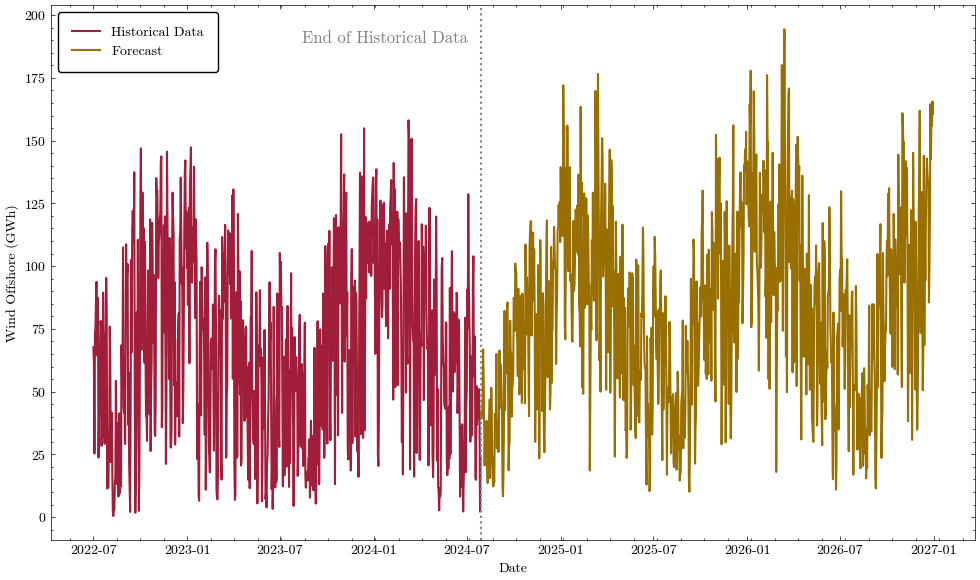

Saved plot for Wind_offshore (GWh) to forecasted_plots/Wind_offshore_(GWh)_forecast_plot.png


In [ ]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Check if SciencePlots is available
try:
    import scienceplots
    plt.style.use(['science', 'no-latex'])
except ImportError:
    print("SciencePlots is not available. Applying similar manual settings.")
    plt.rcParams.update({
        'axes.grid': True,
        'grid.alpha': 0.3,
        'grid.color': 'gray',
        'font.size': 12,
        'axes.labelsize': 14,
        'axes.titlesize': 14,
        'xtick.labelsize': 12,
        'ytick.labelsize': 12,
        'legend.fontsize': 12,
        'lines.linewidth': 1.5,
        'text.usetex': True,
        'font.family': 'serif',
        'figure.dpi': 100,
    })

# Configuration for forecast generation
TARGET_COLUMNS = ["Wind_offshore (GWh)"]
NOISE_LEVEL = 0.05
MULTIPLICATORS = [
    ('2024-07-29', '2024-12-31', 1.02),
    ('2025-01-01', '2025-12-31', 1.22),
    ('2026-01-01', '2026-12-31', 1.32)
]

''' Solar Multiplicators
MULTIPLICATORS = [
    ('2024-07-29', '2024-12-31', 1.22),
    ('2025-01-01', '2025-12-31', 1.18),
    ('2026-01-01', '2026-12-31', 1.36)
]
'''
# Filter and copy DataFrame
df_filtered = df[df['Date'] >= '2022-07-01']
df = df_filtered.copy()


def calculate_daily_means_with_seasonality(df, target_column):
    df['Day'] = df['Date'].dt.day
    df['Month'] = df['Date'].dt.month
    daily_means = df.groupby(['Month', 'Day'])[
        target_column].mean().reset_index()
    daily_means['Seasonal_Adjustment'] = np.sin(
        2 * np.pi * (daily_means['Month'] - 1) / 12) * 0.1
    daily_means['Adjusted_Value'] = daily_means[target_column] * \
        (1 + daily_means['Seasonal_Adjustment'])
    return daily_means


def generate_future_data_with_multiplicators(df, daily_means, start_date, end_date, noise_level=NOISE_LEVEL,
                                             multiplicators=MULTIPLICATORS, seed=42):
    np.random.seed(seed)
    future_dates = pd.date_range(start=start_date, end=end_date)
    future_df = pd.DataFrame({'Date': future_dates})
    future_df['Month'] = future_df['Date'].dt.month
    future_df['Day'] = future_df['Date'].dt.day
    future_df = future_df.merge(daily_means[['Month', 'Day', 'Adjusted_Value']], on=[
                                'Month', 'Day'], how='left')

    if multiplicators:
        for start, end, multiplier in multiplicators:
            mask = (future_df['Date'] >= start) & (future_df['Date'] <= end)
            future_df.loc[mask, 'Adjusted_Value'] *= multiplier

    future_df['Forecast'] = future_df['Adjusted_Value'] * \
        (1 + np.random.normal(0, noise_level, len(future_df)))
    return future_df[['Date', 'Forecast']]


def plot_and_save_data_matplotlib(original_df, future_dfs, target_columns, output_dir="forecasted_plots"):
    os.makedirs(output_dir, exist_ok=True)

    # Define hex colors
    historical_color = '#A11E3B'  # Rot
    forecast_color = '#997000'    # Gold

    for i, target_column in enumerate(target_columns):
        future_df = future_dfs[i]
        future_df.rename(columns={'Forecast': target_column}, inplace=True)

        combined_df = pd.concat([original_df[['Date', target_column]], future_df[['Date', target_column]]],
                                ignore_index=True)

        fig, ax = plt.subplots(figsize=(10, 6))

        # Plot historical data
        ax.plot(original_df['Date'], original_df[target_column],
                color=historical_color, linewidth=1.5, label="Historical Data")

        # Plot forecast data
        ax.plot(future_df['Date'], future_df[target_column],
                color=forecast_color, linewidth=1.5, label="Forecast")

        # Vertical line at the end of historical data
        original_end_date = original_df['Date'].max()
        ax.axvline(x=original_end_date, color='gray',
                   linestyle=':', linewidth=1.5)
        # Set x position slightly to the right of `original_end_date`
        ax.text(original_end_date + pd.Timedelta(days=-350),  # Shift by 5 days to the right
                ax.get_ylim()[1] * 0.95,
                'End of Historical Data',
                ha='left', va='top', color='gray', fontsize=12, style='normal')

        ax.set_xlabel(r"Date")
        ax.set_ylabel("Wind Offshore (GWh)")
        ax.legend(loc='upper left', frameon=True,
                  framealpha=1, borderpad=1, edgecolor='black')

        plt.tight_layout()
        plot_filename = os.path.join(
            output_dir, f"{target_column.replace(' ', '_').replace('/', '_')}_forecast_plot.png")
        plt.savefig(plot_filename, format='png', bbox_inches='tight', dpi=300)
        plt.show()
        print(f"Saved plot for {target_column} to {plot_filename}")


def save_forecast_to_csv(future_dfs, target_columns, output_dir="forecasted_data"):
    os.makedirs(output_dir, exist_ok=True)
    for i, target_column in enumerate(target_columns):
        file_name = f"{target_column.replace(' ', '_').replace('/', '_')}_forecast.csv"
        file_path = os.path.join(output_dir, file_name)
        future_df = future_dfs[i]
        future_df.rename(columns={'Forecast': target_column}, inplace=True)
        future_df.to_csv(file_path, index=False)
        print(f"Saved forecasted data for {target_column} to {file_path}")


# Generate future data for forecast plotting
future_dfs = []
for target_column in TARGET_COLUMNS:
    daily_means = calculate_daily_means_with_seasonality(df, target_column)
    future_df = generate_future_data_with_multiplicators(
        df, daily_means, start_date='2024-07-29', end_date='2026-12-31')
    future_dfs.append(future_df)

# Save forecast data to CSV
save_forecast_to_csv(future_dfs, TARGET_COLUMNS)

# Plot and save forecast plot
plot_and_save_data_matplotlib(df, future_dfs, TARGET_COLUMNS)

# Create combined plot for solar energy and wind offshore

Saved forecasted data for Solar_energy (GWh) to forecasted_data/Solar_energy_(GWh)_forecast.csv
Saved forecasted data for Wind_offshore (GWh) to forecasted_data/Wind_offshore_(GWh)_forecast.csv


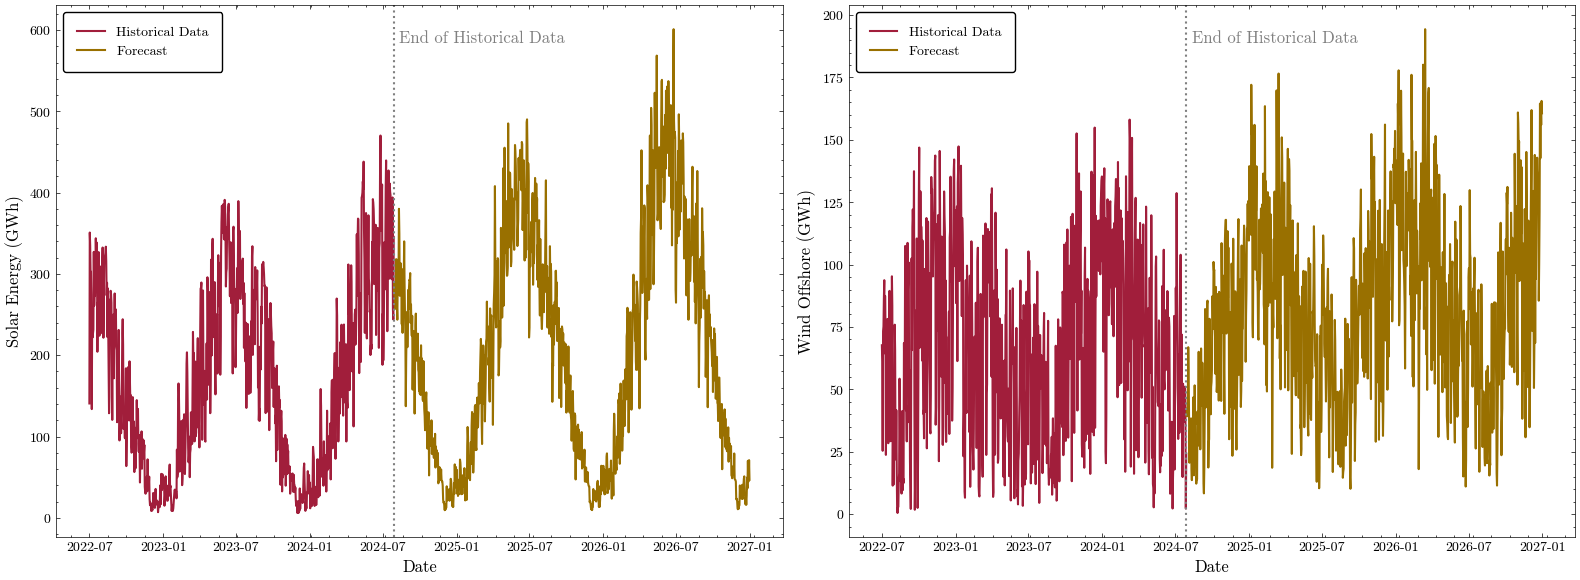

Saved grid plot to forecasted_plots/forecast_grid_plot.png


In [ ]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Check if SciencePlots is available
try:
    import scienceplots
    plt.style.use(['science', 'no-latex'])
except ImportError:
    print("SciencePlots is not available. Applying similar manual settings.")
    plt.rcParams.update({
        'axes.grid': True,
        'grid.alpha': 0.3,
        'grid.color': 'gray',
        'font.size': 12,
        'axes.labelsize': 14,
        'axes.titlesize': 14,
        'xtick.labelsize': 12,
        'ytick.labelsize': 12,
        'legend.fontsize': 12,
        'lines.linewidth': 1.5,
        'text.usetex': True,
        'font.family': 'serif',
        'figure.dpi': 100,
    })

# Configuration for forecast generation
TARGET_COLUMNS = {
    "Solar_energy (GWh)": {
        "multiplicators": [
            ('2024-07-29', '2024-12-31', 1.22),
            ('2025-01-01', '2025-12-31', 1.18),
            ('2026-01-01', '2026-12-31', 1.36)
        ],
        "y_label": "Solar Energy (GWh)"
    },
    "Wind_offshore (GWh)": {
        "multiplicators": [
            ('2024-07-29', '2024-12-31', 1.02),
            ('2025-01-01', '2025-12-31', 1.22),
            ('2026-01-01', '2026-12-31', 1.32)
        ],
        "y_label": "Wind Offshore (GWh)"
    }
}
NOISE_LEVEL = 0.05

# Filter and copy DataFrame
df_filtered = df[df['Date'] >= '2022-07-01']
df = df_filtered.copy()


def calculate_daily_means_with_seasonality(df, target_column):
    df['Day'] = df['Date'].dt.day
    df['Month'] = df['Date'].dt.month
    daily_means = df.groupby(['Month', 'Day'])[
        target_column].mean().reset_index()
    daily_means['Seasonal_Adjustment'] = np.sin(
        2 * np.pi * (daily_means['Month'] - 1) / 12) * 0.1
    daily_means['Adjusted_Value'] = daily_means[target_column] * \
        (1 + daily_means['Seasonal_Adjustment'])
    return daily_means


def generate_future_data_with_multiplicators(df, daily_means, start_date, end_date, noise_level=NOISE_LEVEL,
                                             multiplicators=None, seed=42):
    np.random.seed(seed)
    future_dates = pd.date_range(start=start_date, end=end_date)
    future_df = pd.DataFrame({'Date': future_dates})
    future_df['Month'] = future_df['Date'].dt.month
    future_df['Day'] = future_df['Date'].dt.day
    future_df = future_df.merge(daily_means[['Month', 'Day', 'Adjusted_Value']], on=[
                                'Month', 'Day'], how='left')

    if multiplicators:
        for start, end, multiplier in multiplicators:
            mask = (future_df['Date'] >= start) & (future_df['Date'] <= end)
            future_df.loc[mask, 'Adjusted_Value'] *= multiplier

    future_df['Forecast'] = future_df['Adjusted_Value'] * \
        (1 + np.random.normal(0, noise_level, len(future_df)))
    return future_df[['Date', 'Forecast']]


def plot_and_save_data_matplotlib(original_df, future_dfs, target_columns, output_dir="forecasted_plots"):
    os.makedirs(output_dir, exist_ok=True)

    fig, axes = plt.subplots(1, 2, figsize=(16, 6), sharex=True)

    for ax, (target_column, config) in zip(axes, target_columns.items()):
        future_df = future_dfs[target_column]
        future_df.rename(columns={'Forecast': target_column}, inplace=True)

        # Plot historical data
        ax.plot(original_df['Date'], original_df[target_column],
                color='#A11E3B', linewidth=1.5, label="Historical Data")

        # Plot forecast data
        ax.plot(future_df['Date'], future_df[target_column],
                color='#997000', linewidth=1.5, label="Forecast")

        # Vertical line at the end of historical data
        original_end_date = original_df['Date'].max()
        ax.axvline(x=original_end_date, color='gray',
                   linestyle=':', linewidth=1.5)
        ax.text(original_end_date + pd.Timedelta(days=14),
                ax.get_ylim()[1] * 0.95,
                'End of Historical Data',
                ha='left', va='top', color='gray', fontsize=12, style='normal')

        ax.set_xlabel("Date", fontsize=12)
        ax.set_ylabel(config['y_label'], fontsize=12)
        ax.legend(loc='upper left', frameon=True,
                  framealpha=1, borderpad=1, edgecolor='black')

    plt.tight_layout()
    plot_filename = os.path.join(output_dir, "covariates_wind_solar_sim.png")
    plt.savefig(plot_filename, format='png', bbox_inches='tight', dpi=300)
    plt.show()
    print(f"Saved grid plot to {plot_filename}")


def save_forecast_to_csv(future_dfs, target_columns, output_dir="forecasted_data"):
    os.makedirs(output_dir, exist_ok=True)
    for target_column in target_columns:
        file_name = f"{target_column.replace(' ', '_').replace('/', '_')}_forecast.csv"
        file_path = os.path.join(output_dir, file_name)
        future_df = future_dfs[target_column]
        future_df.rename(columns={'Forecast': target_column}, inplace=True)
        future_df.to_csv(file_path, index=False)
        print(f"Saved forecasted data for {target_column} to {file_path}")


# Generate future data for forecast plotting
future_dfs = {}
for target_column, config in TARGET_COLUMNS.items():
    daily_means = calculate_daily_means_with_seasonality(df, target_column)
    future_df = generate_future_data_with_multiplicators(
        df, daily_means, start_date='2024-07-29', end_date='2026-12-31', multiplicators=config['multiplicators'])
    future_dfs[target_column] = future_df

# Save forecast data to CSV
save_forecast_to_csv(future_dfs, TARGET_COLUMNS)

# Plot and save forecast plot
plot_and_save_data_matplotlib(df, future_dfs, TARGET_COLUMNS)

### Wind Offshore

In [ ]:
import plotly.graph_objs as go
import pandas as pd
import numpy as np
import os

TARGET_COLUMNS = ["Wind_offshore (GWh)"]

df = load_and_prepare_data(
    '/Users/skyfano/Documents/Masterarbeit/Prediction_of_energy_prices/data/Final_data/final_data_july.csv')

# Drop the last 10 columns
df = df.drop(df.columns[-10:], axis=1)

# Calculate mean solar radiation per day with monthly seasonality
# reduce the size of df start at the year 2018 first of january
df_filtered = df[df['Date'] >= '2022-07-01']
df = df_filtered.copy()


def calculate_daily_means_with_seasonality(df, target_column):
    df['Day'] = df['Date'].dt.day
    df['Month'] = df['Date'].dt.month
    daily_means = df.groupby(['Month', 'Day'])[
        target_column].mean().reset_index()

    # Add sinusoidal seasonal variation based on month
    daily_means['Seasonal_Adjustment'] = np.sin(
        2 * np.pi * (daily_means['Month'] - 1) / 12) * 0.1
    daily_means['Adjusted_Value'] = daily_means[target_column] * \
        (1 + daily_means['Seasonal_Adjustment'])
    return daily_means

# Generate future data with minimal variability and multiplicator adjustments


def generate_future_data_with_multiplicators(df, daily_means, start_date, end_date, noise_level=0.2,
                                             multiplicators=None, use_last_years=1, seed=42):
    np.random.seed(seed)
    future_dates = pd.date_range(start=start_date, end=end_date)
    future_df = pd.DataFrame({'Date': future_dates})
    future_df['Month'] = future_df['Date'].dt.month
    future_df['Day'] = future_df['Date'].dt.day

    # Option to use more than the last year for prediction
    recent_data_start_date = df['Date'].max(
    ) - pd.DateOffset(years=use_last_years)
    recent_data = df[df['Date'] >= recent_data_start_date]

    # Merge future dates with daily means
    future_df = future_df.merge(daily_means[['Month', 'Day', 'Adjusted_Value']], on=[
                                'Month', 'Day'], how='left')

    # Apply multiplicators per year period
    if multiplicators:
        for start, end, multiplier in multiplicators:
            mask = (future_df['Date'] >= start) & (future_df['Date'] <= end)
            future_df.loc[mask, 'Adjusted_Value'] *= multiplier

    future_df['Forecast'] = future_df['Adjusted_Value'] * \
        (1 + np.random.normal(0, noise_level, size=len(future_df)))
    return future_df[['Date', 'Forecast']]

# Plot the data for each target column separately and save the plot


def plot_and_save_data(original_df, future_dfs, target_columns, output_dir="forecasted_plots"):
    # Create output directory if it doesn't exist
    if not os.path.exists(output_dir):
        os.makedirs(output_dir)

    for i, target_column in enumerate(target_columns):
        future_df = future_dfs[i]

        # Ensure future data column matches TARGET_COLUMN
        future_df.rename(columns={'Forecast': target_column}, inplace=True)

        # Combine the original and future datasets
        combined_df = pd.concat([original_df[['Date', target_column]], future_df[[
                                'Date', target_column]]], ignore_index=True)

        # Plot historical and forecast data for the current column
        fig = go.Figure()

        # Plot historical data
        fig.add_trace(go.Scatter(
            x=original_df['Date'],
            y=original_df[target_column],
            mode='lines',
            name=f"{target_column} (Historical)",
            line=dict(color='blue', width=1)
        ))

        # Plot future data
        fig.add_trace(go.Scatter(
            x=future_df['Date'],
            y=future_df[target_column],
            mode='lines',
            name=f"{target_column} (Forecast)",
            line=dict(color='darkred', width=1)
        ))

        # Add vertical line indicating the end of the original data
        original_end_date = original_df['Date'].max()
        fig.add_vline(x=original_end_date, line=dict(
            color='darkgreen', dash='dash'), name='End of Original Data')

        # Update layout for each plot
        fig.update_layout(
            title=f"{target_column} Over Time (Historical and Forecast)",
            xaxis_title="Date",
            yaxis_title=target_column,
            legend=dict(yanchor="top", y=0.99, xanchor="left", x=0.01),
            template='plotly'
        )

        # Save the figure as a PNG file
        plot_filename = os.path.join(
            output_dir, f"{target_column.replace(' ', '_').replace('/', '_')}_forecast_plot.png")
        fig.write_image(plot_filename)
        fig.show()
        print(f"Saved plot for {target_column} to {plot_filename}")

# Save the forecasted future data for each target column into separate CSV files


def save_forecast_to_csv(future_dfs, target_columns, output_dir="forecasted_data"):
    # Create the output directory if it doesn't exist
    if not os.path.exists(output_dir):
        os.makedirs(output_dir)

    for i, target_column in enumerate(target_columns):
        # Prepare the filename and full path
        file_name = f"{target_column.replace(' ', '_').replace('/', '_')}_forecast.csv"
        file_path = os.path.join(output_dir, file_name)

        # Save the future dataframe for the target column to CSV
        future_df = future_dfs[i]
        future_df.rename(columns={'Forecast': target_column}, inplace=True)
        future_df.to_csv(file_path, index=False)

        print(f"Saved forecasted data for {target_column} to {file_path}")


# Global configuration
NOISE_LEVEL = 0.05
TOTAL_PREDICTION_LENGTH = 730
MULTIPLICATORS = [
    ('2024-07-29', '2024-12-31', 1.02),
    ('2025-01-01', '2025-12-31', 1.22),
    ('2026-01-01', '2026-12-31', 1.32)
]

# Generate daily means with seasonality and future data for each column
future_dfs = []
for target_column in TARGET_COLUMNS:
    daily_means = calculate_daily_means_with_seasonality(df, target_column)
    future_df = generate_future_data_with_multiplicators(
        df, daily_means, start_date='2024-07-29', end_date='2026-12-31', noise_level=NOISE_LEVEL,
        multiplicators=MULTIPLICATORS, use_last_years=1, seed=42)
    future_dfs.append(future_df)

# Save forecasted data to CSV files
save_forecast_to_csv(future_dfs, TARGET_COLUMNS)

# Plot the combined data for each target column and save the plot
plot_and_save_data(df, future_dfs, TARGET_COLUMNS)

Saved forecasted data for Wind_offshore (GWh) to forecasted_data/Wind_offshore_(GWh)_forecast.csv


Saved plot for Wind_offshore (GWh) to forecasted_plots/Wind_offshore_(GWh)_forecast_plot.png


### Wind_onshore

In [ ]:
import plotly.graph_objs as go
import pandas as pd
import numpy as np
import os

TARGET_COLUMNS = ["Wind_onshore (GWh)"]

df = load_and_prepare_data(
    '/Users/skyfano/Documents/Masterarbeit/Prediction_of_energy_prices/data/Final_data/final_data_july.csv')

# Drop the last 10 columns
df = df.drop(df.columns[-10:], axis=1)

# Calculate mean solar radiation per day with monthly seasonality
# reduce the size of df start at the year 2018 first of january
df_filtered = df[df['Date'] >= '2022-07-01']
df = df_filtered.copy()


def calculate_daily_means_with_seasonality(df, target_column):
    df['Day'] = df['Date'].dt.day
    df['Month'] = df['Date'].dt.month
    daily_means = df.groupby(['Month', 'Day'])[
        target_column].mean().reset_index()

    # Add sinusoidal seasonal variation based on month
    daily_means['Seasonal_Adjustment'] = np.sin(
        2 * np.pi * (daily_means['Month'] - 1) / 12) * 0.1
    daily_means['Adjusted_Value'] = daily_means[target_column] * \
        (1 + daily_means['Seasonal_Adjustment'])
    return daily_means

# Generate future data with minimal variability and multiplicator adjustments


def generate_future_data_with_multiplicators(df, daily_means, start_date, end_date, noise_level=0.2,
                                             multiplicators=None, use_last_years=1, seed=42):
    np.random.seed(seed)
    future_dates = pd.date_range(start=start_date, end=end_date)
    future_df = pd.DataFrame({'Date': future_dates})
    future_df['Month'] = future_df['Date'].dt.month
    future_df['Day'] = future_df['Date'].dt.day

    # Option to use more than the last year for prediction
    recent_data_start_date = df['Date'].max(
    ) - pd.DateOffset(years=use_last_years)
    recent_data = df[df['Date'] >= recent_data_start_date]

    # Merge future dates with daily means
    future_df = future_df.merge(daily_means[['Month', 'Day', 'Adjusted_Value']], on=[
                                'Month', 'Day'], how='left')

    # Apply multiplicators per year period
    if multiplicators:
        for start, end, multiplier in multiplicators:
            mask = (future_df['Date'] >= start) & (future_df['Date'] <= end)
            future_df.loc[mask, 'Adjusted_Value'] *= multiplier

    future_df['Forecast'] = future_df['Adjusted_Value'] * \
        (1 + np.random.normal(0, noise_level, size=len(future_df)))
    return future_df[['Date', 'Forecast']]

# Plot the data for each target column separately and save the plot


def plot_and_save_data(original_df, future_dfs, target_columns, output_dir="forecasted_plots"):
    # Create output directory if it doesn't exist
    if not os.path.exists(output_dir):
        os.makedirs(output_dir)

    for i, target_column in enumerate(target_columns):
        future_df = future_dfs[i]

        # Ensure future data column matches TARGET_COLUMN
        future_df.rename(columns={'Forecast': target_column}, inplace=True)

        # Combine the original and future datasets
        combined_df = pd.concat([original_df[['Date', target_column]], future_df[[
                                'Date', target_column]]], ignore_index=True)

        # Plot historical and forecast data for the current column
        fig = go.Figure()

        # Plot historical data
        fig.add_trace(go.Scatter(
            x=original_df['Date'],
            y=original_df[target_column],
            mode='lines',
            name=f"{target_column} (Historical)",
            line=dict(color='blue', width=1)
        ))

        # Plot future data
        fig.add_trace(go.Scatter(
            x=future_df['Date'],
            y=future_df[target_column],
            mode='lines',
            name=f"{target_column} (Forecast)",
            line=dict(color='darkred', width=1)
        ))

        # Add vertical line indicating the end of the original data
        original_end_date = original_df['Date'].max()
        fig.add_vline(x=original_end_date, line=dict(
            color='darkgreen', dash='dash'), name='End of Original Data')

        # Update layout for each plot
        fig.update_layout(
            title=f"{target_column} Over Time (Historical and Forecast)",
            xaxis_title="Date",
            yaxis_title=target_column,
            legend=dict(yanchor="top", y=0.99, xanchor="left", x=0.01),
            template='plotly'
        )

        # Save the figure as a PNG file
        plot_filename = os.path.join(
            output_dir, f"{target_column.replace(' ', '_').replace('/', '_')}_forecast_plot.png")
        fig.write_image(plot_filename)
        fig.show()
        print(f"Saved plot for {target_column} to {plot_filename}")

# Save the forecasted future data for each target column into separate CSV files


def save_forecast_to_csv(future_dfs, target_columns, output_dir="forecasted_data"):
    # Create the output directory if it doesn't exist
    if not os.path.exists(output_dir):
        os.makedirs(output_dir)

    for i, target_column in enumerate(target_columns):
        # Prepare the filename and full path
        file_name = f"{target_column.replace(' ', '_').replace('/', '_')}_forecast.csv"
        file_path = os.path.join(output_dir, file_name)

        # Save the future dataframe for the target column to CSV
        future_df = future_dfs[i]
        future_df.rename(columns={'Forecast': target_column}, inplace=True)
        future_df.to_csv(file_path, index=False)

        print(f"Saved forecasted data for {target_column} to {file_path}")


# Global configuration
NOISE_LEVEL = 0.15
TOTAL_PREDICTION_LENGTH = 730
MULTIPLICATORS = [
    ('2024-07-29', '2024-12-31', 1.03),
    ('2025-01-01', '2025-12-31', 1.18),
    ('2026-01-01', '2026-12-31', 1.29)
]

# Generate daily means with seasonality and future data for each column
future_dfs = []
for target_column in TARGET_COLUMNS:
    daily_means = calculate_daily_means_with_seasonality(df, target_column)
    future_df = generate_future_data_with_multiplicators(
        df, daily_means, start_date='2024-07-29', end_date='2026-12-31', noise_level=NOISE_LEVEL,
        multiplicators=MULTIPLICATORS, use_last_years=1, seed=42)
    future_dfs.append(future_df)

# Save forecasted data to CSV files
save_forecast_to_csv(future_dfs, TARGET_COLUMNS)

# Plot the combined data for each target column and save the plot
plot_and_save_data(df, future_dfs, TARGET_COLUMNS)

Saved forecasted data for Wind_onshore (GWh) to forecasted_data/Wind_onshore_(GWh)_forecast.csv


Saved plot for Wind_onshore (GWh) to forecasted_plots/Wind_onshore_(GWh)_forecast_plot.png


## Lignite


In [ ]:
import plotly.graph_objs as go
import pandas as pd
import numpy as np
import os

TARGET_COLUMNS = ["Lignite (GWh)"]

df = load_and_prepare_data(
    '/Users/skyfano/Documents/Masterarbeit/Prediction_of_energy_prices/data/Final_data/final_data_july.csv')

# Drop the last 10 columns
df = df.drop(df.columns[-10:], axis=1)

# Calculate mean solar radiation per day with monthly seasonality
# reduce the size of df start at the year 2018 first of january
df_filtered = df[df['Date'] >= '2022-07-01']
df = df_filtered.copy()


def calculate_daily_means_with_seasonality(df, target_column):
    df['Day'] = df['Date'].dt.day
    df['Month'] = df['Date'].dt.month
    daily_means = df.groupby(['Month', 'Day'])[
        target_column].mean().reset_index()

    # Add sinusoidal seasonal variation based on month
    daily_means['Seasonal_Adjustment'] = np.sin(
        2 * np.pi * (daily_means['Month'] - 1) / 12) * 0.1
    daily_means['Adjusted_Value'] = daily_means[target_column] * \
        (1 + daily_means['Seasonal_Adjustment'])
    return daily_means

# Generate future data with minimal variability and multiplicator adjustments


def generate_future_data_with_multiplicators(df, daily_means, start_date, end_date, noise_level=0.2,
                                             multiplicators=None, use_last_years=1, seed=42):
    np.random.seed(seed)
    future_dates = pd.date_range(start=start_date, end=end_date)
    future_df = pd.DataFrame({'Date': future_dates})
    future_df['Month'] = future_df['Date'].dt.month
    future_df['Day'] = future_df['Date'].dt.day

    # Option to use more than the last year for prediction
    recent_data_start_date = df['Date'].max(
    ) - pd.DateOffset(years=use_last_years)
    recent_data = df[df['Date'] >= recent_data_start_date]

    # Merge future dates with daily means
    future_df = future_df.merge(daily_means[['Month', 'Day', 'Adjusted_Value']], on=[
                                'Month', 'Day'], how='left')

    # Apply multiplicators per year period
    if multiplicators:
        for start, end, multiplier in multiplicators:
            mask = (future_df['Date'] >= start) & (future_df['Date'] <= end)
            future_df.loc[mask, 'Adjusted_Value'] *= multiplier

    # Generate forecast with noise
    future_df['Forecast'] = future_df['Adjusted_Value'] * \
        (1 + np.random.normal(0, noise_level, size=len(future_df)))

    # Cap forecast values at 400
    future_df['Forecast'] = np.where(
        future_df['Forecast'] > 400, 400, future_df['Forecast'])

    return future_df[['Date', 'Forecast']]


# Plot the data for each target column separately and save the plot


def plot_and_save_data(original_df, future_dfs, target_columns, output_dir="forecasted_plots"):
    # Create output directory if it doesn't exist
    if not os.path.exists(output_dir):
        os.makedirs(output_dir)

    for i, target_column in enumerate(target_columns):
        future_df = future_dfs[i]

        # Ensure future data column matches TARGET_COLUMN
        future_df.rename(columns={'Forecast': target_column}, inplace=True)

        # Combine the original and future datasets
        combined_df = pd.concat([original_df[['Date', target_column]], future_df[[
                                'Date', target_column]]], ignore_index=True)

        # Plot historical and forecast data for the current column
        fig = go.Figure()

        # Plot historical data
        fig.add_trace(go.Scatter(
            x=original_df['Date'],
            y=original_df[target_column],
            mode='lines',
            name=f"{target_column} (Historical)",
            line=dict(color='blue', width=1)
        ))

        # Plot future data
        fig.add_trace(go.Scatter(
            x=future_df['Date'],
            y=future_df[target_column],
            mode='lines',
            name=f"{target_column} (Forecast)",
            line=dict(color='darkred', width=1)
        ))

        # Add vertical line indicating the end of the original data
        original_end_date = original_df['Date'].max()
        fig.add_vline(x=original_end_date, line=dict(
            color='darkgreen', dash='dash'), name='End of Original Data')

        # Update layout for each plot
        fig.update_layout(
            title=f"{target_column} Over Time (Historical and Forecast)",
            xaxis_title="Date",
            yaxis_title=target_column,
            legend=dict(yanchor="top", y=0.99, xanchor="left", x=0.01),
            template='plotly'
        )

        # Save the figure as a PNG file
        plot_filename = os.path.join(
            output_dir, f"{target_column.replace(' ', '_').replace('/', '_')}_forecast_plot.png")
        fig.write_image(plot_filename)
        fig.show()
        print(f"Saved plot for {target_column} to {plot_filename}")

# Save the forecasted future data for each target column into separate CSV files


def save_forecast_to_csv(future_dfs, target_columns, output_dir="forecasted_data"):
    # Create the output directory if it doesn't exist
    if not os.path.exists(output_dir):
        os.makedirs(output_dir)

    for i, target_column in enumerate(target_columns):
        # Prepare the filename and full path
        file_name = f"{target_column.replace(' ', '_').replace('/', '_')}_forecast.csv"
        file_path = os.path.join(output_dir, file_name)

        # Save the future dataframe for the target column to CSV
        future_df = future_dfs[i]
        future_df.rename(columns={'Forecast': target_column}, inplace=True)
        future_df.to_csv(file_path, index=False)

        print(f"Saved forecasted data for {target_column} to {file_path}")


# Global configuration
NOISE_LEVEL = 0.2
TOTAL_PREDICTION_LENGTH = 730
MULTIPLICATORS = [
    ('2024-07-29', '2024-12-31', 1.0),
    ('2025-01-01', '2025-12-31', 0.94),
    ('2026-01-01', '2026-12-31', 0.94)
]

# Generate daily means with seasonality and future data for each column
future_dfs = []
for target_column in TARGET_COLUMNS:
    daily_means = calculate_daily_means_with_seasonality(df, target_column)
    future_df = generate_future_data_with_multiplicators(
        df, daily_means, start_date='2024-07-29', end_date='2026-12-31', noise_level=NOISE_LEVEL,
        multiplicators=MULTIPLICATORS, use_last_years=1, seed=42)
    future_dfs.append(future_df)

# Save forecasted data to CSV files
save_forecast_to_csv(future_dfs, TARGET_COLUMNS)

# Plot the combined data for each target column and save the plot
plot_and_save_data(df, future_dfs, TARGET_COLUMNS)

Saved forecasted data for Lignite (GWh) to forecasted_data/Lignite_(GWh)_forecast.csv


Saved plot for Lignite (GWh) to forecasted_plots/Lignite_(GWh)_forecast_plot.png


## Hard coal

In [ ]:
import plotly.graph_objs as go
import pandas as pd
import numpy as np
import os

TARGET_COLUMNS = ["Hard_coal (GWh)"]

df = load_and_prepare_data(
    '/Users/skyfano/Documents/Masterarbeit/Prediction_of_energy_prices/data/Final_data/final_data_july.csv')

# Drop the last 10 columns
df = df.drop(df.columns[-10:], axis=1)

# Calculate mean solar radiation per day with monthly seasonality
# reduce the size of df start at the year 2018 first of january
df_filtered = df[df['Date'] >= '2022-07-01']
df = df_filtered.copy()


def calculate_daily_means_with_seasonality(df, target_column):
    df['Day'] = df['Date'].dt.day
    df['Month'] = df['Date'].dt.month
    daily_means = df.groupby(['Month', 'Day'])[
        target_column].mean().reset_index()

    # Add sinusoidal seasonal variation based on month
    daily_means['Seasonal_Adjustment'] = np.sin(
        2 * np.pi * (daily_means['Month'] - 1) / 12) * 0.1
    daily_means['Adjusted_Value'] = daily_means[target_column] * \
        (1 + daily_means['Seasonal_Adjustment'])
    return daily_means

# Generate future data with minimal variability and multiplicator adjustments


def generate_future_data_with_multiplicators(df, daily_means, start_date, end_date, noise_level=0.2,
                                             multiplicators=None, use_last_years=1, seed=42):
    np.random.seed(seed)
    future_dates = pd.date_range(start=start_date, end=end_date)
    future_df = pd.DataFrame({'Date': future_dates})
    future_df['Month'] = future_df['Date'].dt.month
    future_df['Day'] = future_df['Date'].dt.day

    # Option to use more than the last year for prediction
    recent_data_start_date = df['Date'].max(
    ) - pd.DateOffset(years=use_last_years)
    recent_data = df[df['Date'] >= recent_data_start_date]

    # Merge future dates with daily means
    future_df = future_df.merge(daily_means[['Month', 'Day', 'Adjusted_Value']], on=[
                                'Month', 'Day'], how='left')

    # Apply multiplicators per year period
    if multiplicators:
        for start, end, multiplier in multiplicators:
            mask = (future_df['Date'] >= start) & (future_df['Date'] <= end)
            future_df.loc[mask, 'Adjusted_Value'] *= multiplier

    future_df['Forecast'] = future_df['Adjusted_Value'] * \
        (1 + np.random.normal(0, noise_level, size=len(future_df)))
    return future_df[['Date', 'Forecast']]

# Plot the data for each target column separately and save the plot


def plot_and_save_data(original_df, future_dfs, target_columns, output_dir="forecasted_plots"):
    # Create output directory if it doesn't exist
    if not os.path.exists(output_dir):
        os.makedirs(output_dir)

    for i, target_column in enumerate(target_columns):
        future_df = future_dfs[i]

        # Ensure future data column matches TARGET_COLUMN
        future_df.rename(columns={'Forecast': target_column}, inplace=True)

        # Combine the original and future datasets
        combined_df = pd.concat([original_df[['Date', target_column]], future_df[[
                                'Date', target_column]]], ignore_index=True)

        # Plot historical and forecast data for the current column
        fig = go.Figure()

        # Plot historical data
        fig.add_trace(go.Scatter(
            x=original_df['Date'],
            y=original_df[target_column],
            mode='lines',
            name=f"{target_column} (Historical)",
            line=dict(color='blue', width=1)
        ))

        # Plot future data
        fig.add_trace(go.Scatter(
            x=future_df['Date'],
            y=future_df[target_column],
            mode='lines',
            name=f"{target_column} (Forecast)",
            line=dict(color='darkred', width=1)
        ))

        # Add vertical line indicating the end of the original data
        original_end_date = original_df['Date'].max()
        fig.add_vline(x=original_end_date, line=dict(
            color='darkgreen', dash='dash'), name='End of Original Data')

        # Update layout for each plot
        fig.update_layout(
            title=f"{target_column} Over Time (Historical and Forecast)",
            xaxis_title="Date",
            yaxis_title=target_column,
            legend=dict(yanchor="top", y=0.99, xanchor="left", x=0.01),
            template='plotly'
        )

        # Save the figure as a PNG file
        plot_filename = os.path.join(
            output_dir, f"{target_column.replace(' ', '_').replace('/', '_')}_forecast_plot.png")
        fig.write_image(plot_filename)
        fig.show()
        print(f"Saved plot for {target_column} to {plot_filename}")

# Save the forecasted future data for each target column into separate CSV files


def save_forecast_to_csv(future_dfs, target_columns, output_dir="forecasted_data"):
    # Create the output directory if it doesn't exist
    if not os.path.exists(output_dir):
        os.makedirs(output_dir)

    for i, target_column in enumerate(target_columns):
        # Prepare the filename and full path
        file_name = f"{target_column.replace(' ', '_').replace('/', '_')}_forecast.csv"
        file_path = os.path.join(output_dir, file_name)

        # Save the future dataframe for the target column to CSV
        future_df = future_dfs[i]
        future_df.rename(columns={'Forecast': target_column}, inplace=True)
        future_df.to_csv(file_path, index=False)

        print(f"Saved forecasted data for {target_column} to {file_path}")


# Global configuration
NOISE_LEVEL = 0.1
TOTAL_PREDICTION_LENGTH = 730
MULTIPLICATORS = [
    ('2024-07-29', '2024-12-31', 0.87),
    ('2025-01-01', '2025-12-31', 0.783),
    ('2026-01-01', '2026-12-31', 0.744)
]

# Generate daily means with seasonality and future data for each column
future_dfs = []
for target_column in TARGET_COLUMNS:
    daily_means = calculate_daily_means_with_seasonality(df, target_column)
    future_df = generate_future_data_with_multiplicators(
        df, daily_means, start_date='2024-07-29', end_date='2026-12-31', noise_level=NOISE_LEVEL,
        multiplicators=MULTIPLICATORS, use_last_years=1, seed=42)
    future_dfs.append(future_df)

# Save forecasted data to CSV files
save_forecast_to_csv(future_dfs, TARGET_COLUMNS)

# Plot the combined data for each target column and save the plot
plot_and_save_data(df, future_dfs, TARGET_COLUMNS)

Saved forecasted data for Hard_coal (GWh) to forecasted_data/Hard_coal_(GWh)_forecast.csv


Saved plot for Hard_coal (GWh) to forecasted_plots/Hard_coal_(GWh)_forecast_plot.png


# Oil_prices


In [ ]:
import plotly.graph_objs as go
import pandas as pd
import numpy as np
import os

TARGET_COLUMNS = ["TTF_gas_price (€/MWh)"]

df = load_and_prepare_data(
    '/Users/skyfano/Documents/Masterarbeit/Prediction_of_energy_prices/data/Final_data/final_data_july.csv')

# Drop the last 10 columns
df = df.drop(df.columns[-10:], axis=1)

# Calculate mean solar radiation per day with monthly seasonality
# df_filtered = df[df['Date'] >= '2022-07-01']
# df = df_filtered.copy()


def calculate_daily_means_with_seasonality(df, target_column):
    df['Day'] = df['Date'].dt.day
    df['Month'] = df['Date'].dt.month
    daily_means = df.groupby(['Month', 'Day'])[
        target_column].mean().reset_index()

    # Add sinusoidal seasonal variation based on month
    daily_means['Seasonal_Adjustment'] = np.sin(
        2 * np.pi * (daily_means['Month'] - 1) / 12) * 0.1
    daily_means['Adjusted_Value'] = daily_means[target_column] * \
        (1 + daily_means['Seasonal_Adjustment'])
    return daily_means

# Generate future data with minimal variability and multiplicator adjustments


def generate_future_data_with_multiplicators(df, daily_means, start_date, end_date, noise_level=0.2,
                                             multiplicators=None, use_last_years=1, seed=42):
    np.random.seed(seed)
    future_dates = pd.date_range(start=start_date, end=end_date)
    future_df = pd.DataFrame({'Date': future_dates})
    future_df['Month'] = future_df['Date'].dt.month
    future_df['Day'] = future_df['Date'].dt.day

    # Option to use more than the last year for prediction
    recent_data_start_date = df['Date'].max(
    ) - pd.DateOffset(years=use_last_years)
    recent_data = df[df['Date'] >= recent_data_start_date]

    # Merge future dates with daily means
    future_df = future_df.merge(daily_means[['Month', 'Day', 'Adjusted_Value']], on=[
                                'Month', 'Day'], how='left')

    # Apply multiplicators per year period
    if multiplicators:
        for start, end, multiplier in multiplicators:
            mask = (future_df['Date'] >= start) & (future_df['Date'] <= end)
            future_df.loc[mask, 'Adjusted_Value'] *= multiplier

    future_df['Forecast'] = future_df['Adjusted_Value'] * \
        (1 + np.random.normal(0, noise_level, size=len(future_df)))
    return future_df[['Date', 'Forecast']]

# Plot the data for each target column separately and save the plot


def plot_and_save_data(original_df, future_dfs, target_columns, output_dir="forecasted_plots"):
    # Create output directory if it doesn't exist
    if not os.path.exists(output_dir):
        os.makedirs(output_dir)

    for i, target_column in enumerate(target_columns):
        future_df = future_dfs[i]

        # Ensure future data column matches TARGET_COLUMN
        future_df.rename(columns={'Forecast': target_column}, inplace=True)

        # Combine the original and future datasets
        combined_df = pd.concat([original_df[['Date', target_column]], future_df[[
                                'Date', target_column]]], ignore_index=True)

        # Plot historical and forecast data for the current column
        fig = go.Figure()

        # Plot historical data
        fig.add_trace(go.Scatter(
            x=original_df['Date'],
            y=original_df[target_column],
            mode='lines',
            name=f"{target_column} (Historical)",
            line=dict(color='blue', width=1)
        ))

        # Plot future data
        fig.add_trace(go.Scatter(
            x=future_df['Date'],
            y=future_df[target_column],
            mode='lines',
            name=f"{target_column} (Forecast)",
            line=dict(color='darkred', width=1)
        ))

        # Add vertical line indicating the end of the original data
        original_end_date = original_df['Date'].max()
        fig.add_vline(x=original_end_date, line=dict(
            color='darkgreen', dash='dash'), name='End of Original Data')

        # Update layout for each plot
        fig.update_layout(
            title=f"{target_column} Over Time (Historical and Forecast)",
            xaxis_title="Date",
            yaxis_title=target_column,
            legend=dict(yanchor="top", y=0.99, xanchor="left", x=0.01),
            template='plotly'
        )

        # Save the figure as a PNG file
        plot_filename = os.path.join(
            output_dir, f"{target_column.replace(' ', '_').replace('/', '_')}_forecast_plot.png")
        fig.write_image(plot_filename)
        fig.show()
        print(f"Saved plot for {target_column} to {plot_filename}")

# Save the forecasted future data for each target column into separate CSV files


def save_forecast_to_csv(future_dfs, target_columns, output_dir="forecasted_data"):
    # Create the output directory if it doesn't exist
    if not os.path.exists(output_dir):
        os.makedirs(output_dir)

    for i, target_column in enumerate(target_columns):
        # Prepare the filename and full path
        file_name = f"{target_column.replace(' ', '_').replace('/', '_')}_forecast.csv"
        file_path = os.path.join(output_dir, file_name)

        # Save the future dataframe for the target column to CSV
        future_df = future_dfs[i]
        future_df.rename(columns={'Forecast': target_column}, inplace=True)
        future_df.to_csv(file_path, index=False)

        print(f"Saved forecasted data for {target_column} to {file_path}")


# Global configuration
NOISE_LEVEL = 0.01
TOTAL_PREDICTION_LENGTH = 730
MULTIPLICATORS = [
    ('2024-07-29', '2024-12-31', 1),
    ('2025-01-01', '2025-12-31', 1.1),
    ('2026-01-01', '2026-12-31', 1.2)
]

# Generate daily means with seasonality and future data for each column
future_dfs = []
for target_column in TARGET_COLUMNS:
    daily_means = calculate_daily_means_with_seasonality(df, target_column)
    future_df = generate_future_data_with_multiplicators(
        df, daily_means, start_date='2024-07-29', end_date='2026-12-31', noise_level=NOISE_LEVEL,
        multiplicators=MULTIPLICATORS, use_last_years=1, seed=42)
    future_dfs.append(future_df)

# Save forecasted data to CSV files
save_forecast_to_csv(future_dfs, TARGET_COLUMNS)

# Plot the combined data for each target column and save the plot
plot_and_save_data(df, future_dfs, TARGET_COLUMNS)

Saved forecasted data for TTF_gas_price (€/MWh) to forecasted_data/TTF_gas_price_(€_MWh)_forecast.csv


Saved plot for TTF_gas_price (€/MWh) to forecasted_plots/TTF_gas_price_(€_MWh)_forecast_plot.png


## BEV vehicles

In [ ]:
import plotly.graph_objs as go
import pandas as pd
import numpy as np
import os

TARGET_COLUMNS = ["BEV_vehicles"]

df = load_and_prepare_data(
    '/Users/skyfano/Documents/Masterarbeit/Prediction_of_energy_prices/data/Final_data/final_data_july.csv')

# Drop the last 10 columns
df = df.drop(df.columns[-10:], axis=1)

# Calculate mean solar radiation per day with monthly seasonality
# reduce the size of df start at the year 2018 first of january
df_filtered = df[df['Date'] >= '2022-07-01']
df = df_filtered.copy()


def calculate_daily_means_with_seasonality(df, target_column):
    df['Day'] = df['Date'].dt.day
    df['Month'] = df['Date'].dt.month
    daily_means = df.groupby(['Month', 'Day'])[
        target_column].mean().reset_index()

    # Add sinusoidal seasonal variation based on month with reduced factor
    daily_means['Seasonal_Adjustment'] = np.sin(
        2 * np.pi * (daily_means['Month'] - 1) / 12) * 0.05  # reduced to 0.05
    daily_means['Adjusted_Value'] = daily_means[target_column] * \
        (1 + daily_means['Seasonal_Adjustment'])
    return daily_means

# Generate future data with minimal variability and multiplicator adjustments


def generate_future_data_with_multiplicators(df, daily_means, start_date, end_date, noise_level=0.2,
                                             multiplicators=None, use_last_years=1, seed=42, smoothing_window=35):
    np.random.seed(seed)
    future_dates = pd.date_range(start=start_date, end=end_date)
    future_df = pd.DataFrame({'Date': future_dates})
    future_df['Month'] = future_df['Date'].dt.month
    future_df['Day'] = future_df['Date'].dt.day

    # Option to use more than the last year for prediction
    recent_data_start_date = df['Date'].max(
    ) - pd.DateOffset(years=use_last_years)
    recent_data = df[df['Date'] >= recent_data_start_date]

    # Merge future dates with daily means
    future_df = future_df.merge(daily_means[['Month', 'Day', 'Adjusted_Value']], on=[
                                'Month', 'Day'], how='left')

    # Apply multiplicators per year period
    if multiplicators:
        for start, end, multiplier in multiplicators:
            mask = (future_df['Date'] >= start) & (future_df['Date'] <= end)
            future_df.loc[mask, 'Adjusted_Value'] *= multiplier

    future_df['Forecast'] = future_df['Adjusted_Value'] * \
        (1 + np.random.normal(0, noise_level, size=len(future_df)))

    # Apply a rolling mean for smoothing
    future_df['Forecast'] = future_df['Forecast'].rolling(
        window=smoothing_window, min_periods=1).mean()

    # Sum forecasted values per month, round up, and distribute evenly across days
    future_df['YearMonth'] = future_df['Date'].dt.to_period('M')
    monthly_sums = future_df.groupby(
        'YearMonth')['Forecast'].sum().apply(np.ceil).reset_index()
    future_df = future_df.merge(
        monthly_sums, on='YearMonth', suffixes=('', '_MonthlySum'))

    future_df['DaysInMonth'] = future_df['Date'].dt.days_in_month
    future_df['Forecast'] = (
        future_df['Forecast_MonthlySum'] // future_df['DaysInMonth']).astype(int)
    future_df['Remainder'] = future_df['Forecast_MonthlySum'] % future_df['DaysInMonth']

    future_df['Daily_Distributed'] = future_df['Forecast']
    future_df.loc[future_df.groupby('YearMonth')['Date'].transform(
        'max') == future_df['Date'], 'Daily_Distributed'] += future_df['Remainder']

    future_df['Forecast'] = future_df['Daily_Distributed']
    return future_df[['Date', 'Forecast']]


# Plot the data for each target column separately and save the plot


def plot_and_save_data(original_df, future_dfs, target_columns, output_dir="forecasted_plots", development="growth"):
    # Create output directory if it doesn't exist
    if not os.path.exists(output_dir):
        os.makedirs(output_dir)

    for i, target_column in enumerate(target_columns):
        future_df = future_dfs[i]

        # Ensure future data column matches TARGET_COLUMN
        future_df.rename(columns={'Forecast': target_column}, inplace=True)

        # Combine the original and future datasets
        combined_df = pd.concat([original_df[['Date', target_column]], future_df[[
                                'Date', target_column]]], ignore_index=True)

        # Plot historical and forecast data for the current column
        fig = go.Figure()

        # Plot historical data
        fig.add_trace(go.Scatter(
            x=original_df['Date'],
            y=original_df[target_column],
            mode='lines',
            name=f"{target_column} (Historical)",
            line=dict(color='blue', width=1)
        ))

        # Plot future data
        fig.add_trace(go.Scatter(
            x=future_df['Date'],
            y=future_df[target_column],
            mode='lines',
            name=f"{target_column} (Forecast)",
            line=dict(color='darkred', width=1)
        ))

        # Add vertical line indicating the end of the original data
        original_end_date = original_df['Date'].max()
        fig.add_vline(x=original_end_date, line=dict(
            color='darkgreen', dash='dash'), name='End of Original Data')

        # Update layout for each plot
        fig.update_layout(
            title=f"{target_column} Over Time (Historical and Forecast)",
            xaxis_title="Date",
            yaxis_title=target_column,
            legend=dict(yanchor="top", y=0.99, xanchor="left", x=0.01),
            template='plotly'
        )

        # Save the figure as a PNG file
        plot_filename = os.path.join(
            output_dir, f"{target_column.replace(' ', '_').replace('/', '_')}_forecast_plot_{development}.png")
        fig.write_image(plot_filename)
        fig.show()
        print(f"Saved plot for {target_column} to {plot_filename}")

# Save the forecasted future data for each target column into separate CSV files


def save_forecast_to_csv(future_dfs, target_columns, output_dir="forecasted_data", development="growth"):
    # Create the output directory if it doesn't exist
    if not os.path.exists(output_dir):
        os.makedirs(output_dir)

    for i, target_column in enumerate(target_columns):
        # Prepare the filename and full path
        file_name = f"{target_column.replace(' ', '_').replace('/', '_')}_forecast_{development}.csv"
        file_path = os.path.join(output_dir, file_name)

        # Save the future dataframe for the target column to CSV
        future_df = future_dfs[i]
        future_df.rename(columns={'Forecast': target_column}, inplace=True)
        future_df.to_csv(file_path, index=False)

        print(f"Saved forecasted data for {target_column} to {file_path}")


# Global configuration
NOISE_LEVEL = 0.1
TOTAL_PREDICTION_LENGTH = 730
MULTIPLICATORS = [
    ('2024-07-29', '2024-12-31', 1),
    ('2025-01-01', '2025-12-31', 1),
    ('2026-01-01', '2026-12-31', 1)
]
DEVELOPMENT = "constant"  # "growth" or "constant"
OUTPUT_DIR = "forecasted_data"

# Generate daily means with seasonality and future data for each column
future_dfs = []
for target_column in TARGET_COLUMNS:
    daily_means = calculate_daily_means_with_seasonality(df, target_column)
    future_df = generate_future_data_with_multiplicators(
        df, daily_means, start_date='2024-07-28', end_date='2026-07-31', noise_level=NOISE_LEVEL,
        multiplicators=MULTIPLICATORS, use_last_years=1, seed=42)
    future_dfs.append(future_df)

# Save forecasted data to CSV files
save_forecast_to_csv(future_dfs, TARGET_COLUMNS, OUTPUT_DIR, DEVELOPMENT)

# Plot the combined data for each target column and save the plot
plot_and_save_data(df, future_dfs, TARGET_COLUMNS, OUTPUT_DIR, DEVELOPMENT)

Saved forecasted data for BEV_vehicles to forecasted_data/BEV_vehicles_forecast_constant.csv


Saved plot for BEV_vehicles to forecasted_data/BEV_vehicles_forecast_plot_constant.png


## BEV trends in one plot

In [ ]:
# Load in csv file
df_1 = pd.read_csv(
    '/Users/skyfano/Documents/Masterarbeit/Prediction_of_energy_prices/data/Future_data/Manual_simulation/BEV_vehicles_data/BEV_vehicles_forecast_constant.csv')
# rename the column BEV_vehicles to "constant"
df_1.rename(columns={'BEV_vehicles': 'constant'}, inplace=True)

# Load in csv file
df_2 = pd.read_csv(
    '/Users/skyfano/Documents/Masterarbeit/Prediction_of_energy_prices/data/Future_data/Manual_simulation/BEV_vehicles_data/BEV_vehicles_forecast_decline.csv')
# rename the column BEV_vehicles to "constant"
df_2.rename(columns={'BEV_vehicles': 'decline'}, inplace=True)
# Load in csv file
df_3 = pd.read_csv(
    '/Users/skyfano/Documents/Masterarbeit/Prediction_of_energy_prices/data/Future_data/Manual_simulation/BEV_vehicles_data/BEV_vehicles_forecast_growth.csv')
# rename the column BEV_vehicles to "constant"
df_3.rename(columns={'BEV_vehicles': 'growth'}, inplace=True)

In [ ]:
# Merge the dataframes on the "date" column
df_merged = pd.merge(df_1, df_2, on="Date", how="outer",
                     suffixes=('_scenario1', '_scenario2'))
df_merged = pd.merge(df_merged, df_3, on="Date",
                     how="outer", suffixes=('', '_scenario3'))

# Rename the forecast column from the last merge
df_merged = df_merged.rename(columns={'forecast': 'forecast_scenario3'})

# Display the merged dataframe
df = df_merged.copy()

# Set the values for the last days of July 2024 for all columns (constant, decline, growth) to 992
df.loc[(df['Date'] >= '2024-07-28') & (df['Date'] <= '2024-07-31'),
       ['constant', 'decline', 'growth']] = 992

# Verify the changes for the last days of July
print(df[df['Date'].between('2024-07-28', '2024-08-05')])

# Change all values to integer
df['constant'] = df['constant'].astype(int)
df['decline'] = df['decline'].astype(int)
df['growth'] = df['growth'].astype(int)
df

         Date  constant  decline  growth
0  2024-07-28       992      992     992
1  2024-07-29       992      992     992
2  2024-07-30       992      992     992
3  2024-07-31       992      992     992
4  2024-08-01      1693     1370    2499
5  2024-08-02      1693     1370    2499
6  2024-08-03      1693     1370    2499
7  2024-08-04      1693     1370    2499
8  2024-08-05      1693     1370    2499


,Date,constant,decline,growth
0,2024-07-28,992,992,992
1,2024-07-29,992,992,992
2,2024-07-30,992,992,992
3,2024-07-31,992,992,992
4,2024-08-01,1693,1370,2499
...,...,...,...,...
729,2026-07-27,1415,566,4953
730,2026-07-28,1415,566,4953
731,2026-07-29,1415,566,4953
732,2026-07-30,1415,566,4953


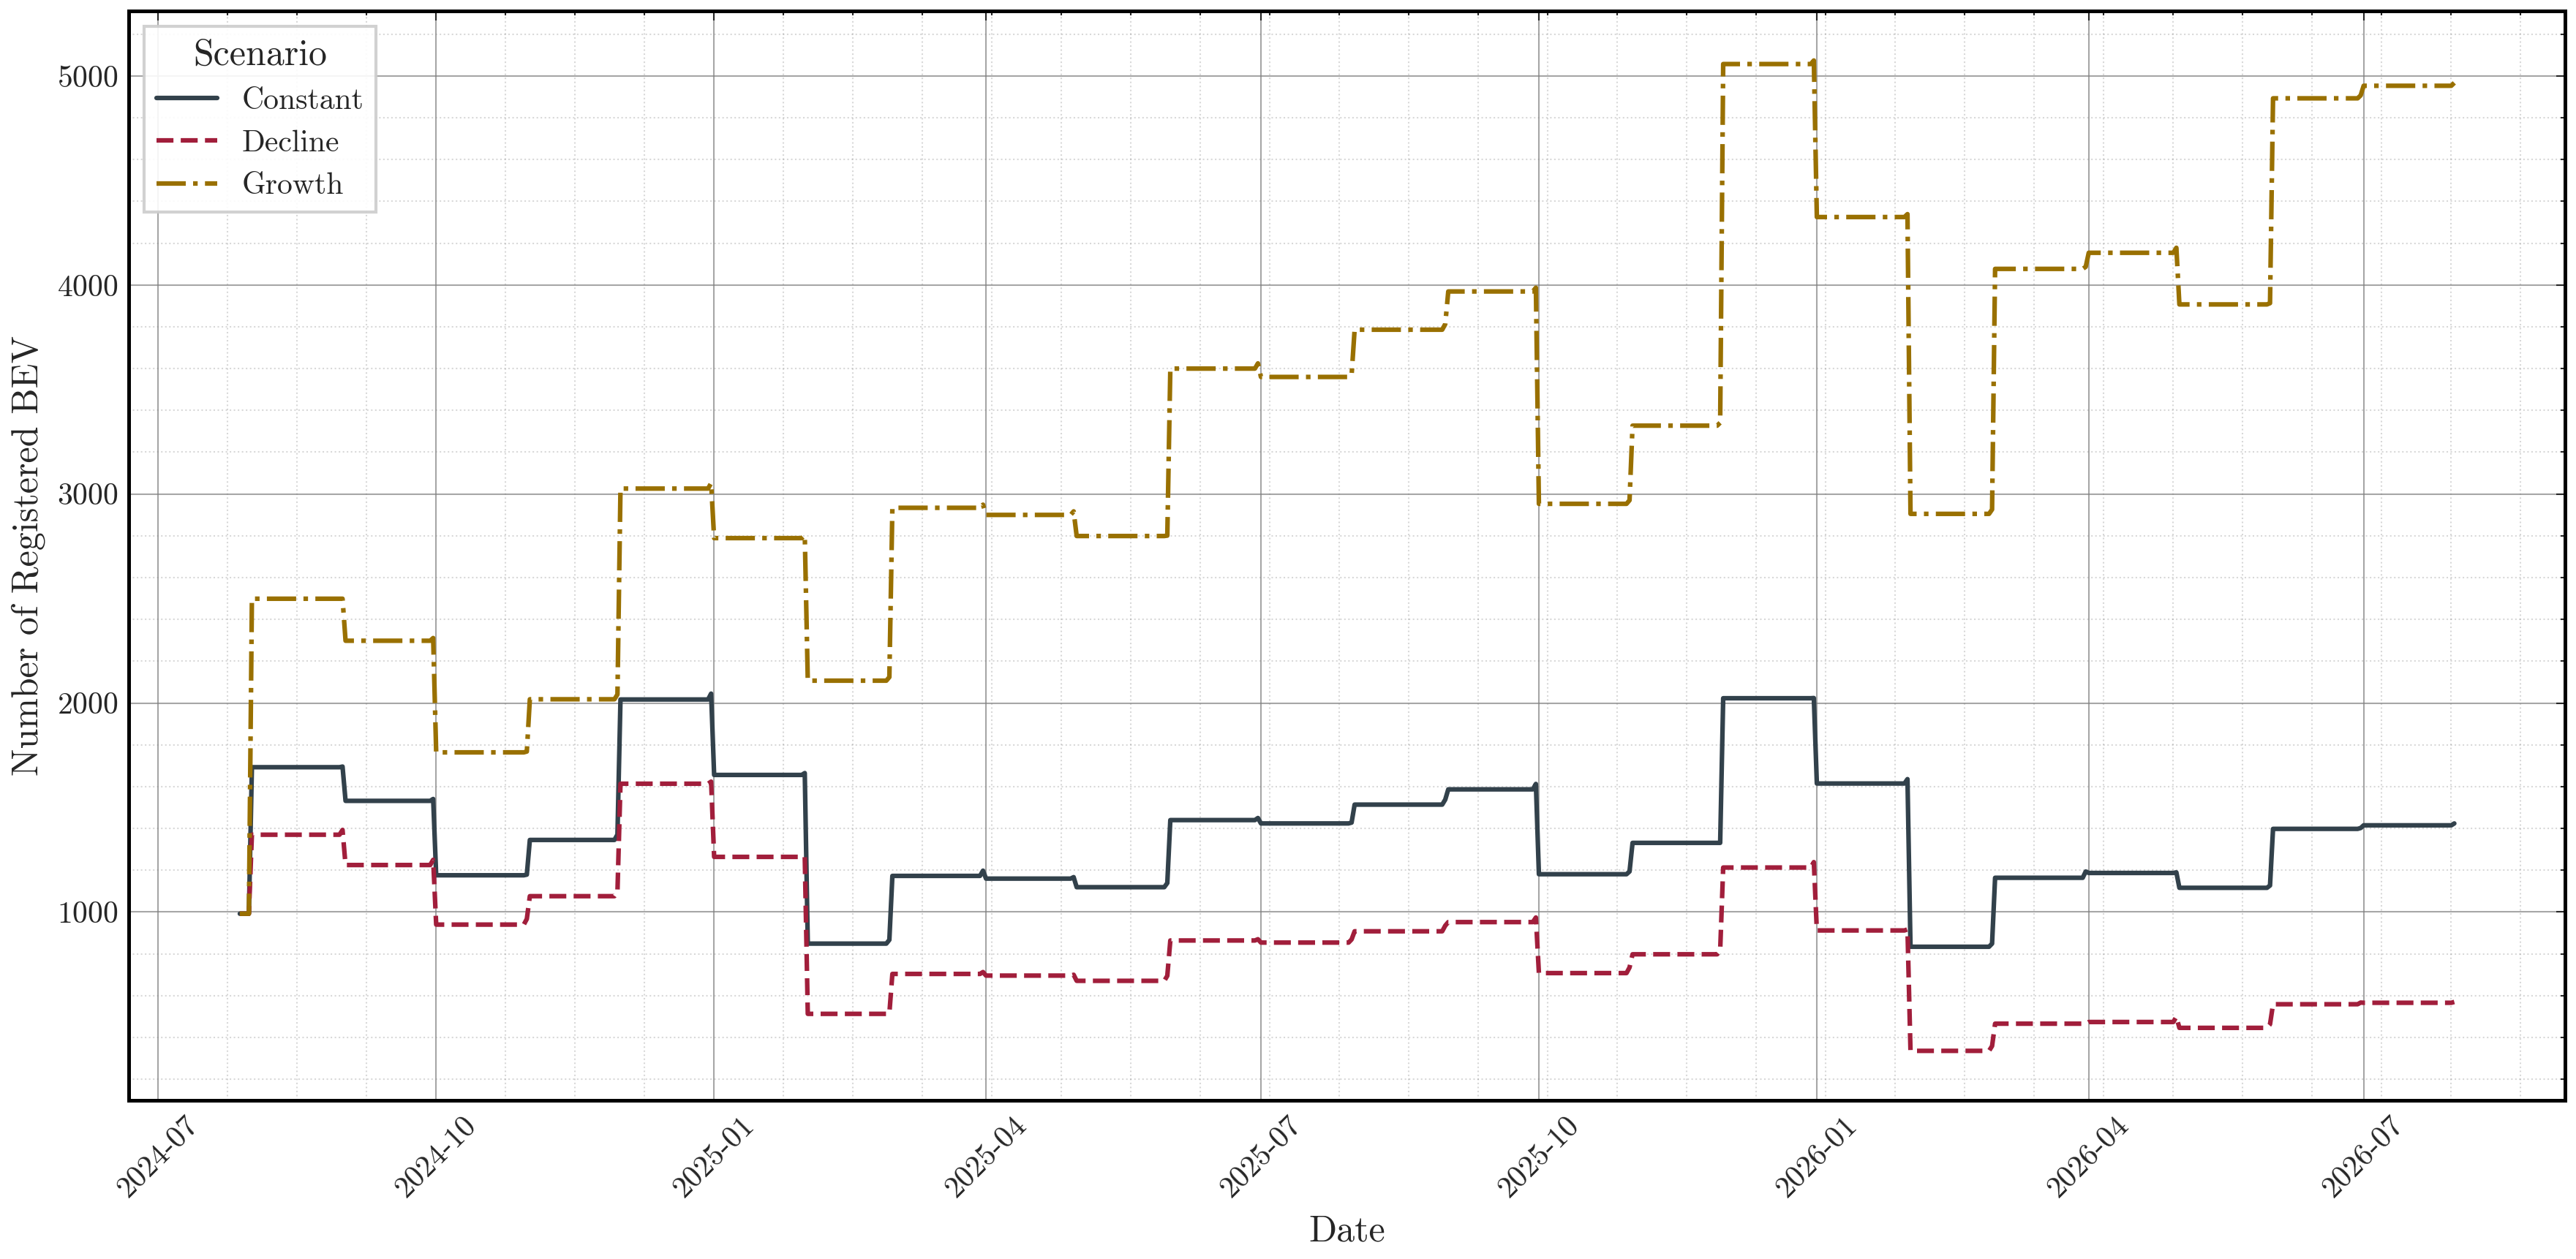

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import scienceplots  # Import scienceplots package

# Ensure the Date column is in datetime format
df['Date'] = pd.to_datetime(df['Date'])

# Apply the SciencePlots style
plt.style.use(['science', 'no-latex'])

# Set figure and font properties for a professional look
plt.figure(figsize=(12, 6), dpi=300)  # High resolution for publication

# Plot lines with the specified hex color codes
plt.plot(df['Date'], df['constant'], label='Constant',
         linewidth=1.5, color='#32414B', linestyle='-')  # Grau
plt.plot(df['Date'], df['decline'], label='Decline',
         linewidth=1.5, color='#A11E3B', linestyle='--')  # Tübi Rot
plt.plot(df['Date'], df['growth'], label='Growth',
         linewidth=1.5, color='#997000', linestyle='-.')  # Tübi Gold

# Labels and title in a professional font and size
plt.xlabel("Date", fontsize=12, fontweight='bold')
plt.ylabel("Number of Registered BEV", fontsize=12, fontweight='bold')

# Enhanced legend with a professional, subtle layout
plt.legend(title="Scenario", fontsize=10, title_fontsize='12', loc='upper left',
           frameon=True, fancybox=False, shadow=False, framealpha=0.9)

# Set minor and major ticks for better accuracy
plt.xticks(rotation=45)
plt.tick_params(axis='both', which='major', labelsize=10)
plt.tick_params(axis='both', which='minor', labelsize=8)

# Lightly customized grid for precision without distraction
plt.grid(True, which='major', linestyle='-',
         linewidth=0.5, color='gray', alpha=0.7)
plt.grid(True, which='minor', linestyle=':',
         linewidth=0.5, color='gray', alpha=0.3)

# Make only the plot borders (spines) more visible
for spine in plt.gca().spines.values():
    spine.set_edgecolor('black')   # Set border color
    spine.set_linewidth(1.2)       # Set border thickness
plt.tight_layout()

# Show the plot
plt.show()

# Create a large grid plot that sums up all covariates 

In [ ]:
# Load in data
df_new = pd.read_csv(
    '/Users/skyfano/Documents/Masterarbeit/Prediction_of_energy_prices/future_prediction/final_df_constant.csv')

In [ ]:
df_new

,Date,Day_ahead_price (€/MWh),Solar_radiation (W/m2),Wind_speed (m/s),Temperature (°C),Biomass (GWh),Hard_coal (GWh),Hydro (GWh),Lignite (GWh),Natural_gas (GWh),...,Solar_energy (GWh),Wind_offshore (GWh),Wind_onshore (GWh),Net_total_export_import (GWh),BEV_vehicles,Oil_price (EUR),TTF_gas_price (€/MWh),Nuclear_energy (GWh),Day_of_week,Month
0,2012-01-08,26.83,17.54,5.21,3.74,98.605,189.718,48.467,354.178,256.892,...,8.039,3.639,251.722,26.066,6.0,103.71,21.33,286.206,6.0,1.0
1,2012-01-09,47.91,13.04,4.24,3.80,98.605,344.154,49.054,382.756,282.438,...,4.942,2.225,153.948,-59.712,6.0,103.64,22.45,294.593,0.0,1.0
2,2012-01-10,45.77,28.71,4.30,4.81,98.605,360.126,51.143,334.267,267.311,...,17.101,2.892,200.075,-31.384,6.0,104.22,21.95,293.534,1.0,1.0
3,2012-01-11,47.83,21.58,4.08,5.14,98.605,360.330,50.693,385.000,277.343,...,10.254,3.059,211.599,-2.110,6.0,103.93,21.95,295.340,2.0,1.0
4,2012-01-12,43.10,25.12,6.77,4.98,98.605,306.521,50.732,332.985,266.820,...,17.576,6.901,477.412,32.997,6.0,102.26,22.08,294.394,3.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5314,2026-07-27,NaN,189.39,2.77,18.77,113.340,49.120,52.740,190.380,148.320,...,273.640,50.030,194.810,-215.890,1415.0,83.89,45.77,0.000,0.0,7.0
5315,2026-07-28,NaN,180.00,3.02,17.93,113.330,39.430,50.970,184.140,119.240,...,367.270,16.940,189.010,-121.440,1415.0,83.94,44.52,0.000,1.0,7.0
5316,2026-07-29,NaN,206.82,3.57,19.11,114.120,64.070,50.410,215.860,150.910,...,302.050,50.050,223.660,-176.430,1415.0,84.56,44.91,0.000,2.0,7.0
5317,2026-07-30,NaN,187.31,2.79,17.18,112.780,56.660,48.420,170.720,106.250,...,309.070,52.440,211.830,1.090,1415.0,83.33,44.15,0.000,3.0,7.0


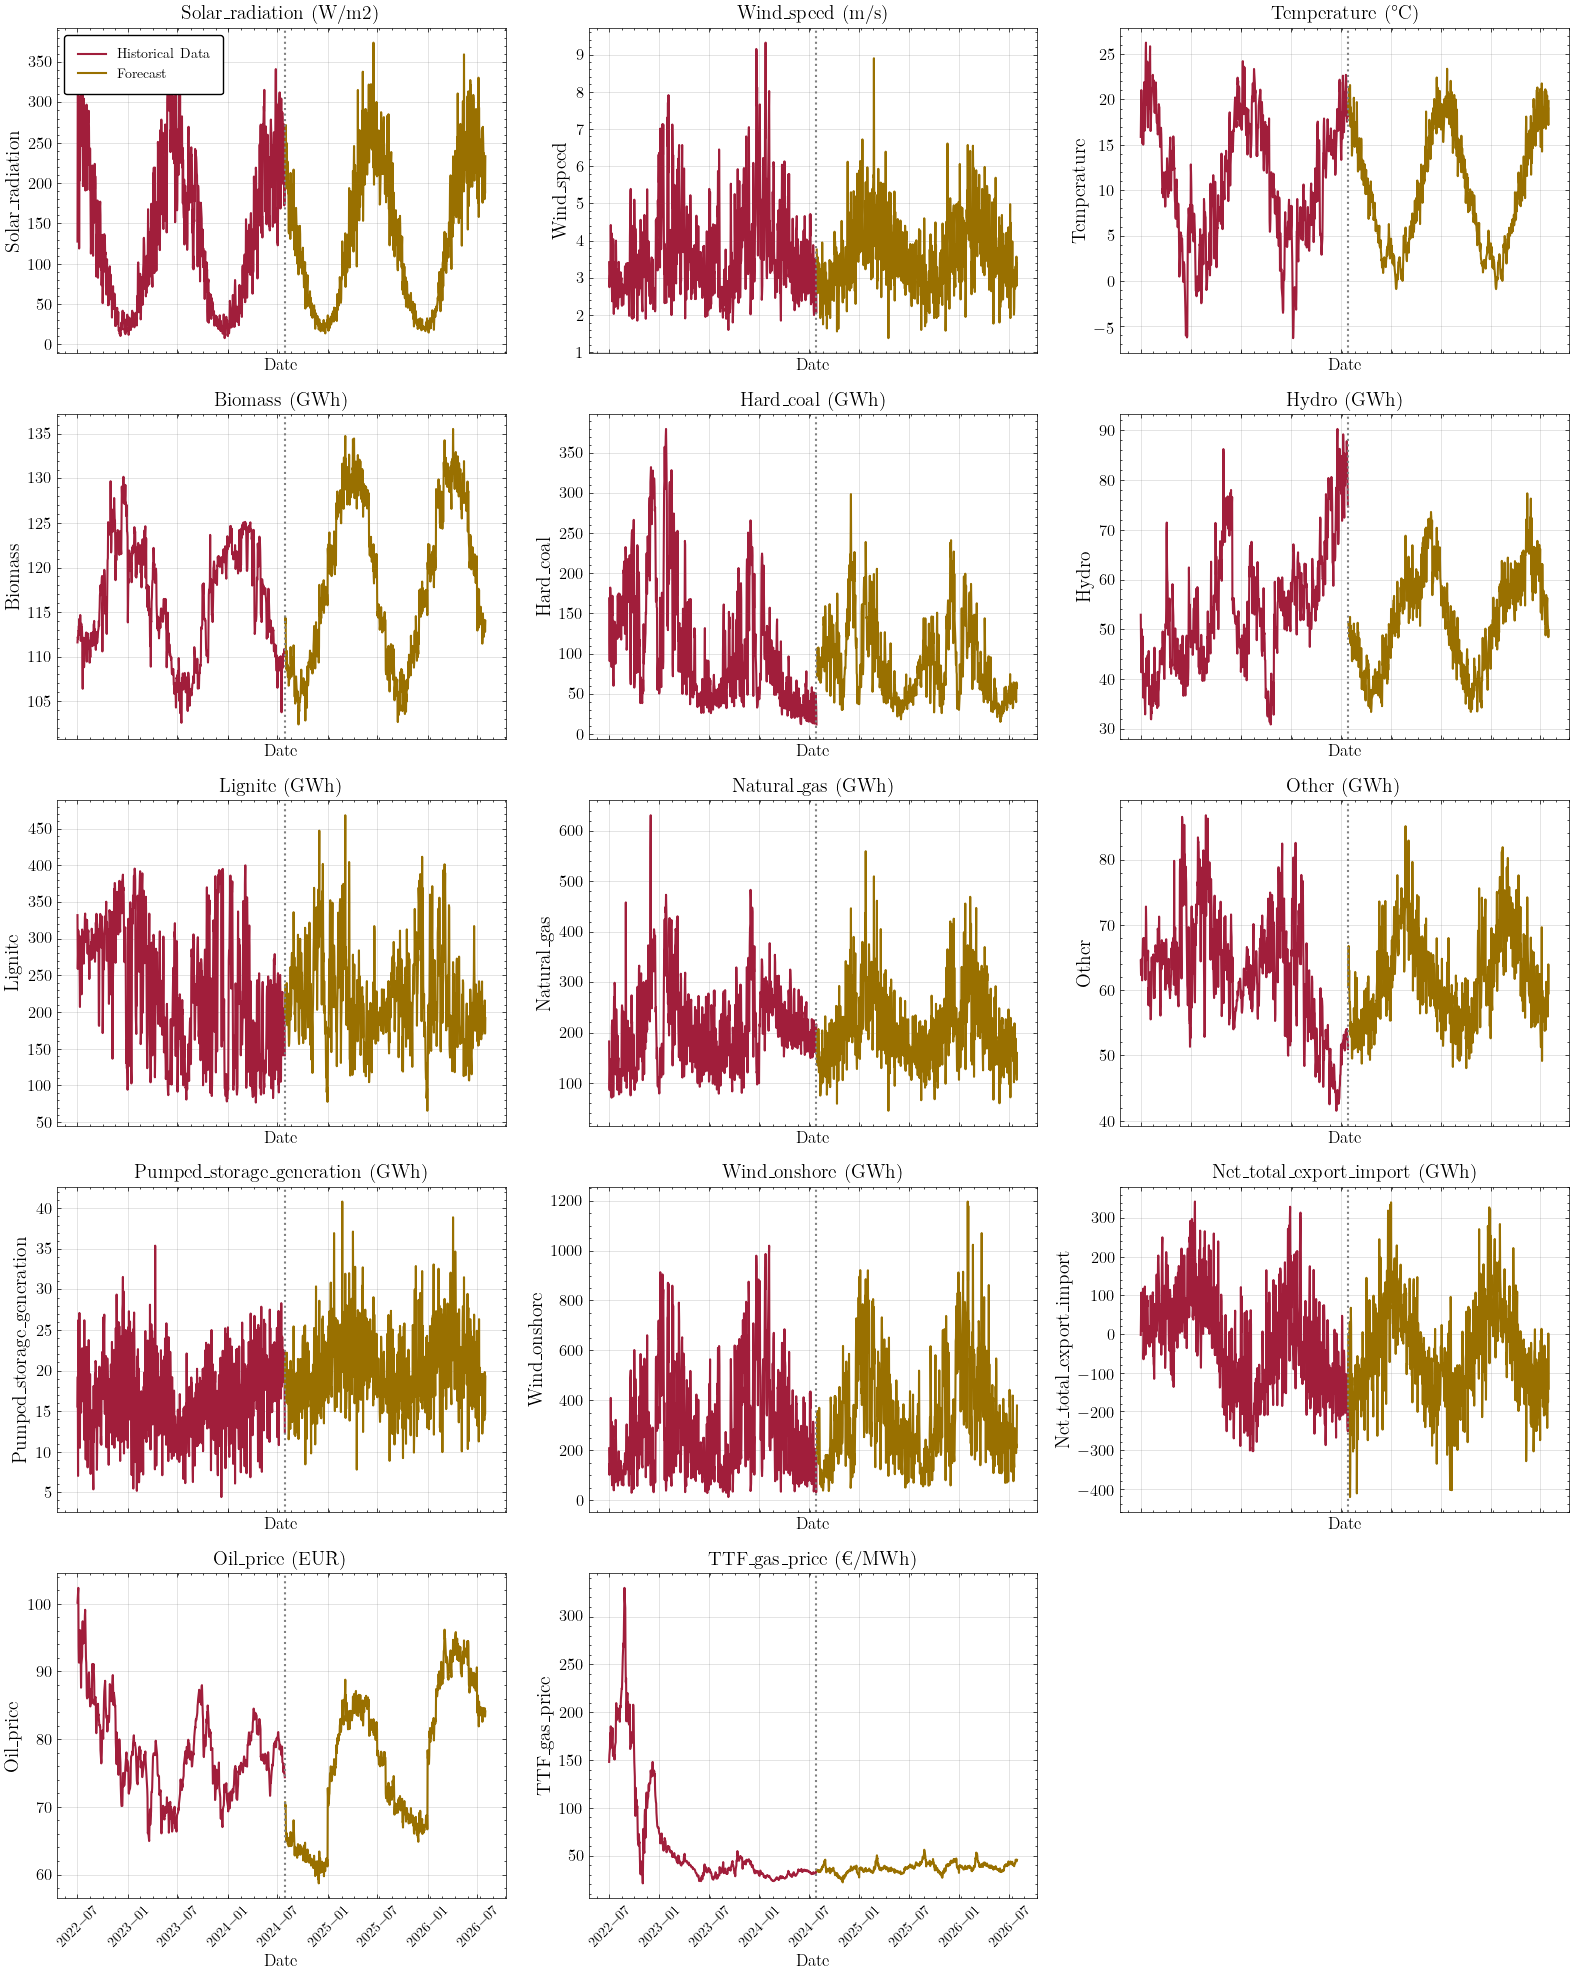

Saved large grid plot to forecasted_plots/forecast_grid_plot.png


In [62]:
import os
import pandas as pd
import matplotlib.pyplot as plt

plt.rcParams.update({
    'axes.grid': True,
    'grid.alpha': 0.3,
    'grid.color': 'gray',
    'font.size': 12,
    'axes.labelsize': 14,
    'axes.titlesize': 14,
    'xtick.labelsize': 12,
    'ytick.labelsize': 12,
    'legend.fontsize': 10,
    'lines.linewidth': 1.5,
    'text.usetex': True,
    'text.latex.preamble': r'\usepackage{lmodern}',  # Use modern LaTeX fonts
    'font.family': 'serif',
    'figure.dpi': 100,
})


def plot_all_columns(df, output_dir="forecasted_plots", date_col="Date", exclude_columns=None):
    """
    Generate a grid of plots for each column in the DataFrame (excluding specified columns and the Date column).
    Save the output in the specified directory.
    """
    os.makedirs(output_dir, exist_ok=True)

    # Ensure Date is datetime and filter data from July 1, 2022
    df[date_col] = pd.to_datetime(df[date_col], errors='coerce')
    df = df[df[date_col] >= "2022-07-01"]

    # Exclude specified columns
    if exclude_columns is None:
        exclude_columns = []
    target_columns = [col for col in df.columns if col !=
                      date_col and col not in exclude_columns]

    num_columns = 3  # Number of plots per row
    # Calculate rows needed (ceil division)
    num_rows = -(-len(target_columns) // num_columns)
    fig, axes = plt.subplots(num_rows, num_columns,
                             figsize=(16, 4 * num_rows), sharex=True)
    axes = axes.flatten()

    historical_color = '#A11E3B'  # Red
    forecast_color = '#997000'    # Gold

    for idx, target_column in enumerate(target_columns):
        ax = axes[idx]

        # Split historical and forecast data
        historical_df = df[df[date_col] <= '2024-07-28']
        forecast_df = df[df[date_col] > '2024-07-28']

        # Plot historical and forecast data
        ax.plot(historical_df[date_col], historical_df[target_column],
                color=historical_color, linewidth=1.5, label="Historical Data")
        ax.plot(forecast_df[date_col], forecast_df[target_column],
                color=forecast_color, linewidth=1.5, label="Forecast")

        # Add vertical line at end of historical data
        if not historical_df.empty:
            ax.axvline(x=historical_df[date_col].max(),
                       color='gray', linestyle=':', linewidth=1.5)

        # Configure axes and title
        ax.set_title(target_column)
        ax.set_xlabel("Date", fontsize=12)
        ax.set_ylabel(target_column.split(' ')[0])  # Simplified label

        # Adjust font size of x-axis tick labels
        ax.tick_params(axis='x', labelsize=10, labelrotation=45)

        if idx == 0:
            ax.legend(loc='upper left', frameon=True,
                      framealpha=1, borderpad=1, edgecolor='black')

    # Hide unused subplots
    for ax in axes[len(target_columns):]:
        ax.axis('off')

    plt.tight_layout()
    plot_filename = os.path.join(output_dir, "forecast_grid_plot.png")
    plt.savefig(plot_filename, format='png', bbox_inches='tight', dpi=300)
    plt.show()
    print(f"Saved large grid plot to {plot_filename}")


# Load the combined historical and forecast data
DATA_PATH = "/Users/skyfano/Documents/Masterarbeit/Prediction_of_energy_prices/future_prediction/final_df_constant.csv"
combined_data = pd.read_csv(DATA_PATH, parse_dates=["Date"])

# Exclude specified columns
exclude_columns = ["Day_ahead_price (€/MWh)", "Nuclear_energy (GWh)", "Month",
                   "Day_of_week", "Solar_energy (GWh)", "Wind_offshore (GWh)", "BEV_vehicles"]

# Plot all columns
plot_all_columns(combined_data, exclude_columns=exclude_columns)